### <font color='purple'>Enhancing IoT Network Security with Advanced Machine Learning Techniques</font>

In [98]:
# Import helper libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns
import shap


# Import ML Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, mean_squared_error, auc

#### <font color='blue'>Dataset has been prepared by clubbing multiple attack and normal traffic CSV files that were generated from PCAP files. We ran the PCAP files through Wireshark to filter the records between attack and normal traffic and then used CICFlowMeter to generate PCAP files into readable CSV files. <br><br> Once CSV files were available, we manually combined them together into a single dataset and labelled them</font>

#### <font color='green'>Load & Analyze Dataset</font>

In [2]:
df = pd.read_csv("IOT_Attacks_Merged.csv")

In [3]:
df.shape

(122358, 83)

In [4]:
df.head()

,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwr_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,label
0,192.168.0.13,210.89.164.90,1649,52330,6,7/25/19 0:20,31304203,10.350048,0.191668,0.191668,...,0.0,0.0,54.0,0.0,0,6,0,324,0,Attack
1,192.168.0.13,210.89.164.90,8884,52330,6,7/25/19 0:20,32364994,8.342347,0.154488,0.154488,...,0.0,0.0,54.0,0.0,0,5,0,270,0,Attack
2,192.168.0.13,210.89.164.90,2215,52330,6,7/25/19 0:20,14809181,14.585547,0.270103,0.270103,...,0.0,0.0,54.0,0.0,0,4,0,216,0,Attack
3,192.168.0.13,210.89.164.90,5839,52330,6,7/25/19 0:20,23762529,6.817456,0.126249,0.126249,...,0.0,0.0,54.0,0.0,0,3,0,162,0,Attack
4,192.168.0.13,210.89.164.90,1657,52330,6,7/25/19 0:20,20070168,10.762242,0.199301,0.199301,...,0.0,0.0,54.0,0.0,0,4,0,216,0,Attack


In [5]:
df.columns

Index(['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'timestamp',
       'flow_duration', 'flow_byts_s', 'flow_pkts_s', 'fwd_pkts_s',
       'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts',
       'totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min',
       'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max',
       'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'pkt_len_max',
       'pkt_len_min', 'pkt_len_mean', 'pkt_len_std', 'pkt_len_var',
       'fwd_header_len', 'bwd_header_len', 'fwd_seg_size_min',
       'fwd_act_data_pkts', 'flow_iat_mean', 'flow_iat_max', 'flow_iat_min',
       'flow_iat_std', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min',
       'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_tot', 'bwd_iat_max',
       'bwd_iat_min', 'bwd_iat_mean', 'bwd_iat_std', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fin_flag_cnt',
       'syn_flag_cnt', 'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt',
       'urg_flag

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122358 entries, 0 to 122357
Data columns (total 83 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   src_ip             122358 non-null  object 
 1   dst_ip             122358 non-null  object 
 2   src_port           122358 non-null  int64  
 3   dst_port           122358 non-null  int64  
 4   protocol           122358 non-null  int64  
 5   timestamp          122358 non-null  object 
 6   flow_duration      122358 non-null  int64  
 7   flow_byts_s        122358 non-null  float64
 8   flow_pkts_s        122358 non-null  float64
 9   fwd_pkts_s         122358 non-null  float64
 10  bwd_pkts_s         122358 non-null  float64
 11  tot_fwd_pkts       122358 non-null  int64  
 12  tot_bwd_pkts       122358 non-null  int64  
 13  totlen_fwd_pkts    122358 non-null  int64  
 14  totlen_bwd_pkts    122358 non-null  int64  
 15  fwd_pkt_len_max    122358 non-null  int64  
 16  fw

In [7]:
df.describe()

,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,...,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwr_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts
count,122358.000000,122358.000000,122358.000000,1.223580e+05,1.223580e+05,122358.000000,122358.000000,122358.000000,122358.000000,122358.000000,...,122358.000000,1.223580e+05,1.223580e+05,122358.000000,122358.000000,122358.000000,122358.000000,122358.000000,1.223580e+05,1.223580e+05
mean,13419.211143,24515.268638,6.150019,2.873157e+06,2.658874e+06,3492.249906,1427.244489,2065.005431,9.975457,2.951413,...,0.035548,3.222108e+04,4.383916e+04,241.688756,296.019171,0.000907,9.975457,2.951413,5.293760e+03,1.465883e+03
std,16203.989576,22431.387231,1.284934,9.384158e+06,5.678854e+06,5868.759172,3071.047887,4282.340200,302.449112,84.406780,...,0.556259,5.460093e+05,7.191709e+05,435.549262,553.046859,0.032708,302.449112,84.406780,2.573937e+05,5.058409e+04
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,4734.000000,554.000000,6.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,54.000000,0.000000,0.000000,1.000000,0.000000,5.400000e+01,0.000000e+00
50%,8240.500000,19604.000000,6.000000,1.170000e+02,0.000000e+00,0.146376,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,54.000000,0.000000,0.000000,1.000000,0.000000,5.400000e+01,0.000000e+00
75%,9020.000000,49784.000000,6.000000,4.850000e+02,1.259993e+05,5952.380952,8.318388,2570.694087,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000e+00,54.000000,0.000000,0.000000,2.000000,1.000000,2.530000e+02,0.000000e+00
max,65535.000000,64955.000000,17.000000,2.424795e+08,1.558889e+08,166666.666700,111111.111100,55555.555560,24873.000000,10615.000000,...,34.000000,2.117647e+07,1.967925e+07,1518.000000,1499.602782,2.000000,24873.000000,10615.000000,2.589108e+07,1.134381e+07


In [8]:
df.label.unique()

array(['Attack', 'Normal'], dtype=object)

Text(0, 0.5, 'Percentage of each target class')

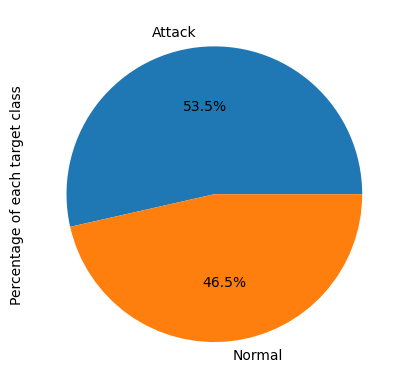

In [9]:
target = df.value_counts('label')
target.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Percentage of each target class')


<font color='darkblue'> We can see from the above chart that our dataset is balanced and that is essential for our use case. We will review the features and data further to see if we need to do some reduction or we can continue with full set. </font>

#### <font color='green'>Perform Deduplication</font>

In [10]:
df_deduped = df.drop_duplicates()
df_deduped.shape

(116878, 83)

In [11]:
dedup_percentage = (len(df)-len(df_deduped))/len(df)*100
print("Percentage of Records Removed: ", dedup_percentage)

Percentage of Records Removed:  4.478660978440314


In [12]:
# Drop original DF to release memory
del df

#### <font color='green'> Checking for NULL Values </font>

In [13]:
# Checking for NULL Values
df_deduped.isnull().sum()[df_deduped.isnull().sum() > 0]

Series([], dtype: int64)

<font color='darkblue'>There are no NULL values in any columns</font>

In [14]:
df_deduped.columns[df_deduped.nunique() <= 2]

Index(['label'], dtype='object')

<font color='darkblue'>Except for "Label" all columns have more than 2 values. So we cannot ignore any features even though we have around 80+ features. We will have to perform further analysis and perform feature reduction before modelling.</font>

#### <font color='green'> Analyze the dataset further

In [15]:
# get the data types of each column
data_types = df_deduped.dtypes

# create a dictionary to group columns by data type
columns_by_type = {}

for column, dtype in data_types.items():
    if dtype not in columns_by_type:
        columns_by_type[dtype] = [column]
    else:
        columns_by_type[dtype].append(column)

# print the data types and their corresponding columns
for dtype, columns in columns_by_type.items():
    print(f'Data Type: {dtype}')
    print(f'Columns: {columns}')
    print('---')

Data Type: object
Columns: ['src_ip', 'dst_ip', 'timestamp', 'label']
---
Data Type: int64
Columns: ['src_port', 'dst_port', 'protocol', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min', 'bwd_pkt_len_max', 'bwd_pkt_len_min', 'pkt_len_max', 'pkt_len_min', 'fwd_header_len', 'bwd_header_len', 'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt', 'ece_flag_cnt', 'init_fwd_win_byts', 'init_bwd_win_byts', 'active_max', 'active_min', 'idle_max', 'idle_min', 'cwr_flag_count', 'subflow_fwd_pkts', 'subflow_bwd_pkts', 'subflow_fwd_byts', 'subflow_bwd_byts']
---
Data Type: float64
Columns: ['flow_byts_s', 'flow_pkts_s', 'fwd_pkts_s', 'bwd_pkts_s', 'fwd_pkt

In [16]:
# Find columns with single values
single_value_cols = [col for col in df_deduped.columns if df_deduped[col].nunique() == 1]

# Find categorical features
categorical_cols = [col for col in df_deduped.columns if df_deduped[col].dtype == 'object']

print("Columns with single values:", single_value_cols)
print("Categorical features:", categorical_cols)

Columns with single values: []
Categorical features: ['src_ip', 'dst_ip', 'timestamp', 'label']


#### <font color='green'> Analyzing timestamp to see if we can establish some traffic trends. However, we need to first convert it into proper format </font>

In [17]:
print("Minimum Tiime Stamp:"+df_deduped['timestamp'].min()+"\nMaximum Time Stamp: "+df_deduped['timestamp'].max())

Minimum Tiime Stamp:20/05/2019 04:56:14 AM
Maximum Time Stamp: 7/25/19 0:27


In [18]:
# Convert Timestamp column to standard format and add a new column
df_deduped['timestamp_clean'] = pd.to_datetime(df_deduped['timestamp'])

/var/folders/07/qch9szx51kdgzhzp77njqrqw001f2_/T/ipykernel_20338/4253273205.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_deduped['timestamp_clean'] = pd.to_datetime(df_deduped['timestamp'])


In [19]:
print("Minimum Tiime Stamp:"+str(df_deduped['timestamp_clean'].min())+"\nMaximum Time Stamp: "+str(df_deduped['timestamp_clean'].max()))

Minimum Tiime Stamp:2019-05-20 04:56:14
Maximum Time Stamp: 2019-07-25 00:27:00


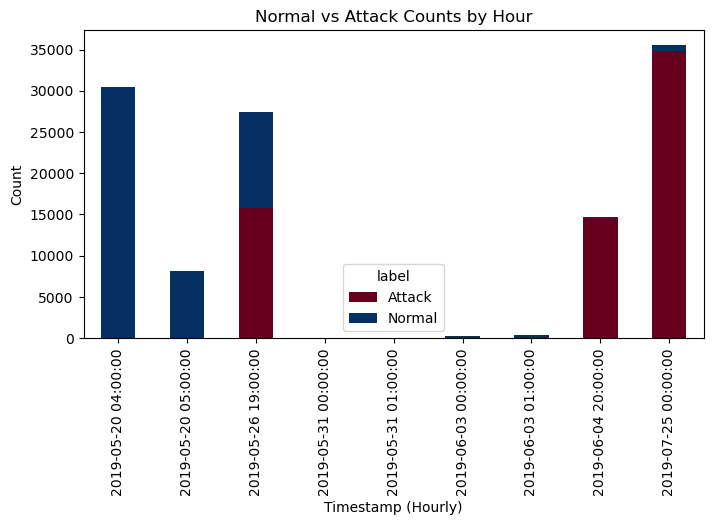

In [20]:
# Group by timestamp_clean and label, and count the number of rows
counts = df_deduped.groupby([pd.Grouper(key='timestamp_clean', freq='H'), 'label']).size().unstack()

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(8,4), colormap='RdBu')

# Label the axes and title
plt.xlabel('Timestamp (Hourly)')
plt.ylabel('Count')
plt.title('Normal vs Attack Counts by Hour')

# Show the plot
plt.show()


<font color='darkblue'>Based on the above it looks like the attack and normal traffic is concentrated only on over certain days with no daily trend. So timestamp most like is not a good feature. However, we will try to plot other trends and validate.</font>

<b>Plotting Packet lengths for Attack and Normal Traffic</b> <br>
fwd_pkt_len_mean - The mean (average) length of packets in the forward direction of the network flow<br>
fwd_pkt_len_std - The standard deviation of packet lengths in the forward direction of the network flow<br>
bwd_pkt_len_mean - The mean (average) length of packets in the backward direction of the network flow<br>
bwd_pkt_len_std - The standard deviation of packet lengths in the backward direction of the network flow

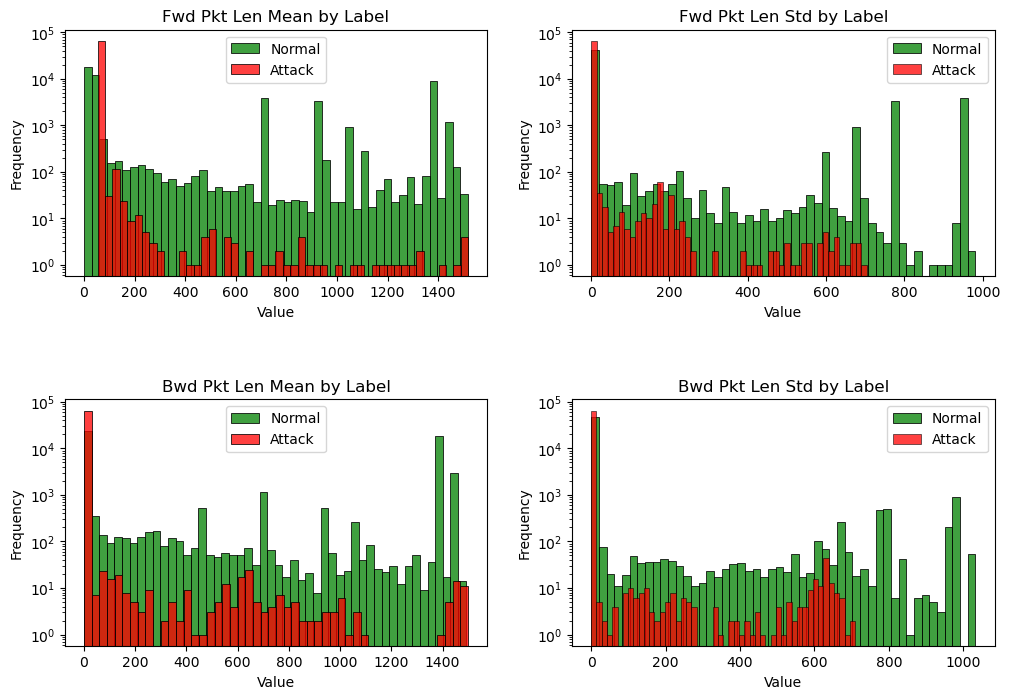

In [21]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define the fields to plot
fields = ['fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_mean', 'bwd_pkt_len_std']

# Define the colors for 'Normal' and 'Attack' labels
normal_color = 'green'
attack_color = 'red'

# Iterate over the fields and axes
for ax, field in zip(axes, fields):
    # Plot the histogram for 'Normal' and 'Attack' labels
    sns.histplot(df_deduped[df_deduped['label'] == 'Normal'][field], label='Normal', ax=ax, kde=False, bins=50, color=normal_color)
    sns.histplot(df_deduped[df_deduped['label'] == 'Attack'][field], label='Attack', ax=ax, kde=False, bins=50, color=attack_color)
    
    # Set the title, labels, and legend
    ax.set_title(f'{field.replace("_", " ").title()} by Label')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    # Set the y-scale to logarithmic
    ax.set_yscale('log')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

<font color='darkblue'>Looking at the charts above, it seems the normal traffic flow is usually consistent with minor spikes. However, attacks are concentrated and not distributed, with certain high spikes</font>

<b>Plotting inter-arrival time for Attack and Normal Traffic</b> <br>
flow_iat_mean - The mean time between two packets sent in the flow, considering all packets in both forward and backward directions<br>
flow_iat_std - The standard deviation of the inter-arrival time between packets in the flow, considering all packets in both forward and backward directions<br>
fwd_iat_mean - The mean time between two packets sent in the forward direction<br>
fwd_iat_std - The standard deviation of the inter-arrival time between packets in the forward direction<br>
bwd_iat_mean - The mean time between two packets sent in the backward direction<br>
bwd_iat_std - The standard deviation of the inter-arrival time between packets in the backward direction<br>

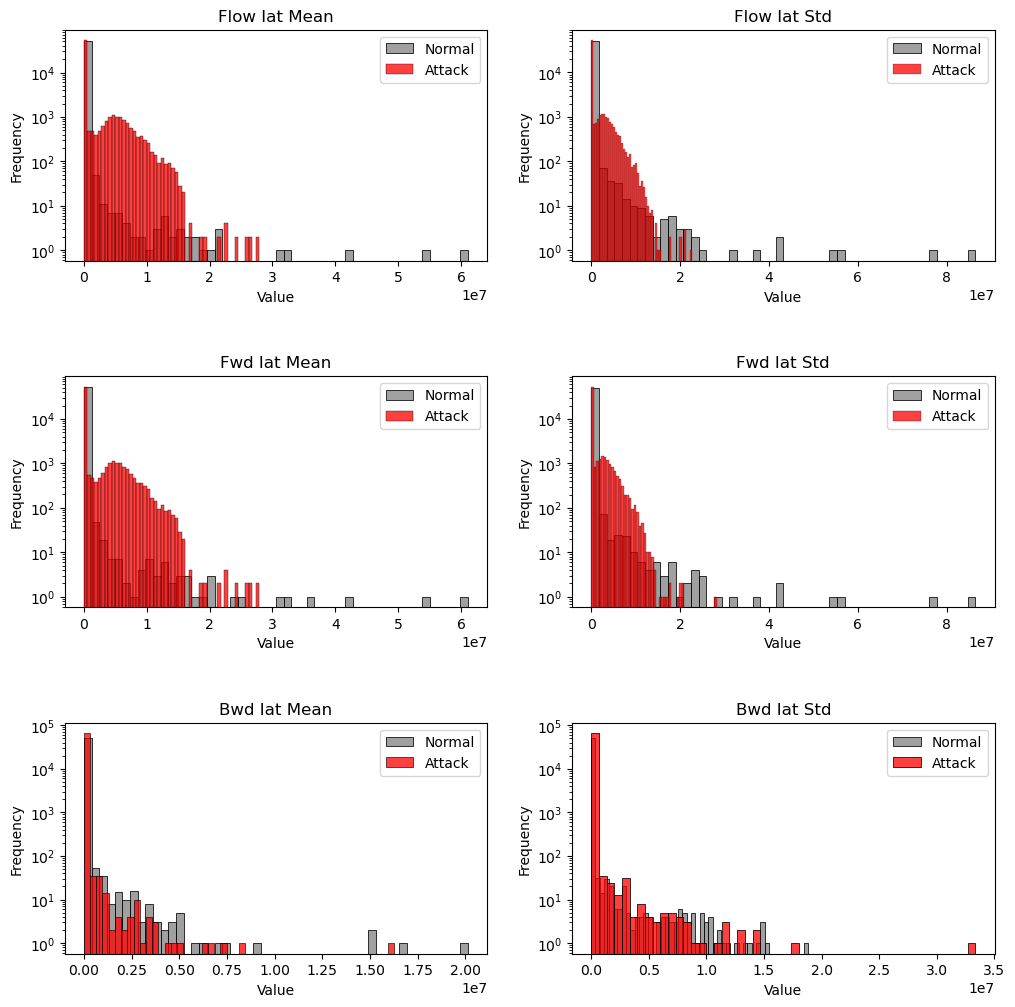

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define the fields to plot
fields = ['flow_iat_mean', 'flow_iat_std', 'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_mean', 'bwd_iat_std']

normal_color = 'grey'
attack_color = 'red'

# Iterate over the fields and axes
for ax, field in zip(axes, fields):
    # Plot the histogram for 'Normal' and 'Attack' labels
    sns.histplot(df_deduped[df_deduped['label'] == 'Normal'][field], label='Normal', ax=ax, kde=False, bins=50, color = normal_color)
    sns.histplot(df_deduped[df_deduped['label'] == 'Attack'][field], label='Attack', ax=ax, kde=False, bins=50, color = attack_color)
    
    # Set the title, labels, and legend
    ax.set_title(field.replace('_', ' ').title())
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    # Set the y-scale to logarithmic
    ax.set_yscale('log')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

<font color='darkblue'>Attack patterns seem to be flooding the network and creating congestion. Normal traffic is even spread out, however, attach patterns show congestion and possible anamolies from the above charts</font>

<b>Plotting Average Packet lengths for Attack and Normal Traffic</b> <br>
pkt_size_avg - The average size of packets in the network flow<br>
fwd_byts_b_avg - The average number of bytes sent in the forward direction per second<br>
fwd_pkts_b_avg - The average number of packets sent in the forward direction per second<br>
bwd_byts_b_avg - The average number of bytes sent in the backward direction per second<br>
bwd_pkts_b_avg - The average number of packets sent in the backward direction per second

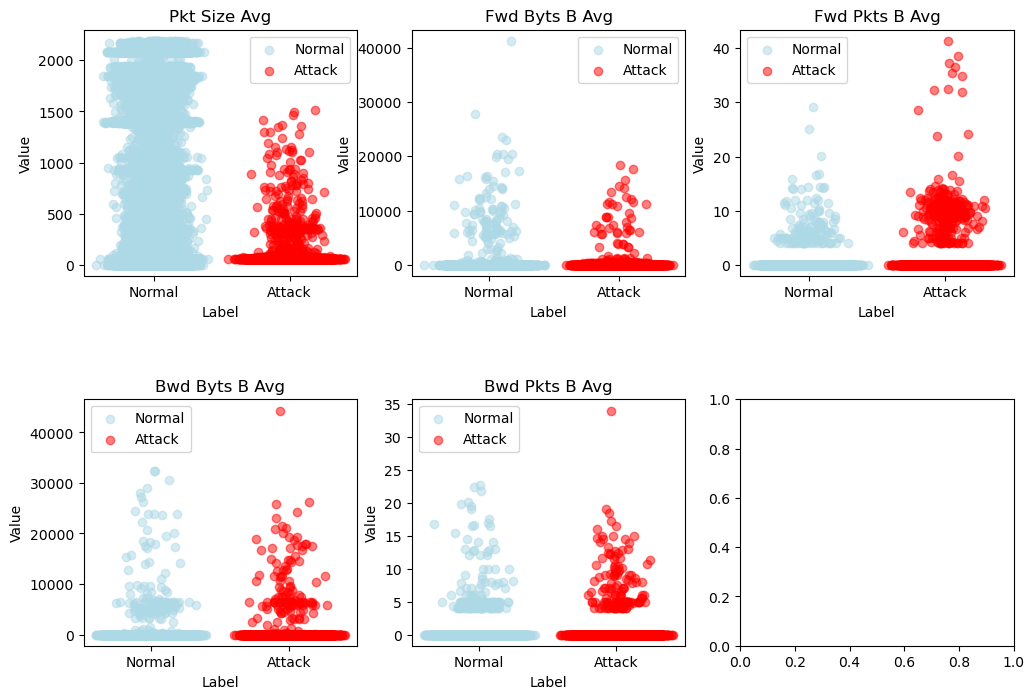

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define the fields to plot
fields = ['pkt_size_avg', 'fwd_byts_b_avg', 'fwd_pkts_b_avg', 'bwd_byts_b_avg', 'bwd_pkts_b_avg']

# Iterate over the fields and axes
for ax, field in zip(axes, fields):
    # Get the data for each label
    normal_data = df_deduped[df_deduped['label'] == 'Normal'][field]
    attack_data = df_deduped[df_deduped['label'] == 'Attack'][field]
    
    # Create the scatter plots
    ax.scatter(np.random.normal(0, 0.1, len(normal_data)), normal_data, color='lightblue', alpha=0.5, label='Normal')
    ax.scatter(np.random.normal(1, 0.1, len(attack_data)), attack_data, color='red', alpha=0.5, label='Attack')
    
    # Set the title and labels
    ax.set_title(field.replace('_', ' ').title())
    ax.set_xlabel('Label')
    ax.set_ylabel('Value')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Normal', 'Attack'])
    ax.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

<font color='darkblue'>We see from the charts above, the packet sizes for attack traffic are not very large. However, we see the number of packets sent per second is very high in attack traffic. This means that attackers are trying to flood the network by sending large number of packets in very small timeframe.</font>

Plotting a Traffic Heatmap

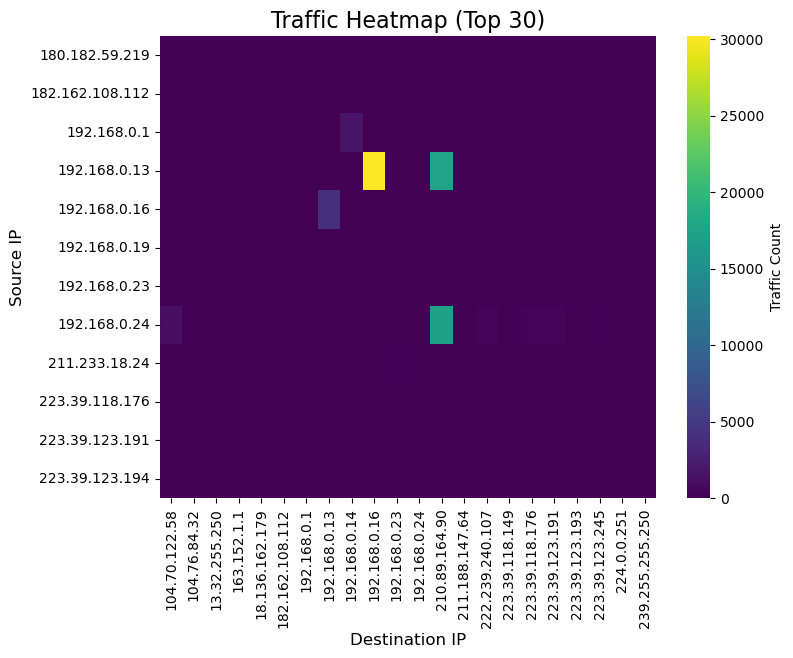

In [24]:
# Aggregate the data by counting the occurrences of each source-destination IP pair
traffic_counts = df_deduped.groupby(['src_ip', 'dst_ip']).size().reset_index(name='count')

# Sort the aggregated data by traffic count in descending order
traffic_counts = traffic_counts.sort_values(by='count', ascending=False)

# Select the top 30 source-destination IP pairs
top_30 = traffic_counts.head(30)

# Create a pivot table with source IPs as rows, destination IPs as columns, and counts as values
traffic_pivot = top_30.pivot(index='src_ip', columns='dst_ip', values='count')

# Fill missing values with 0
traffic_pivot = traffic_pivot.fillna(0)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(traffic_pivot, cmap='viridis', annot=False, cbar_kws={'label': 'Traffic Count'})

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels
plt.title('Traffic Heatmap (Top 30)', fontsize=16)
plt.xlabel('Destination IP', fontsize=12)
plt.ylabel('Source IP', fontsize=12)

# Show the plot
plt.show()

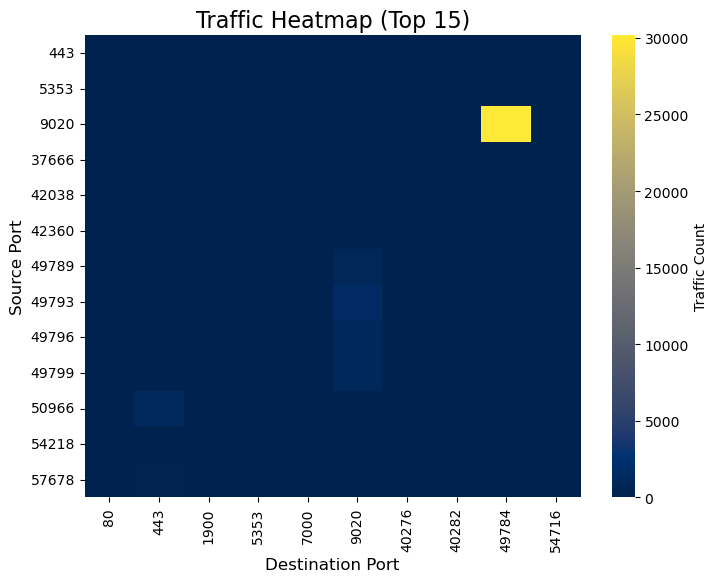

In [25]:
# Aggregate the data by counting the occurrences of each source-destination IP pair
traffic_counts = df_deduped.groupby(['src_port', 'dst_port']).size().reset_index(name='count')

# Sort the aggregated data by traffic count in descending order
traffic_counts = traffic_counts.sort_values(by='count', ascending=False)

# Select the top 15 source-destination IP pairs
top_15 = traffic_counts.head(15)

# Create a pivot table with source IPs as rows, destination IPs as columns, and counts as values
traffic_pivot = top_15.pivot(index='src_port', columns='dst_port', values='count')

# Fill missing values with 0
traffic_pivot = traffic_pivot.fillna(0)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(traffic_pivot, cmap='cividis', annot=False, cbar_kws={'label': 'Traffic Count'})

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels
plt.title('Traffic Heatmap (Top 15)', fontsize=16)
plt.xlabel('Destination Port', fontsize=12)
plt.ylabel('Source Port', fontsize=12)

# Show the plot
plt.show()

<font color='darkblue'> Majority of the traffic is concentrated around few IP addresses and Ports </font>

#### <font color='green'>Plotting boxplots for all Integer & Float features to see the outliers</font>

Plotting for Integers

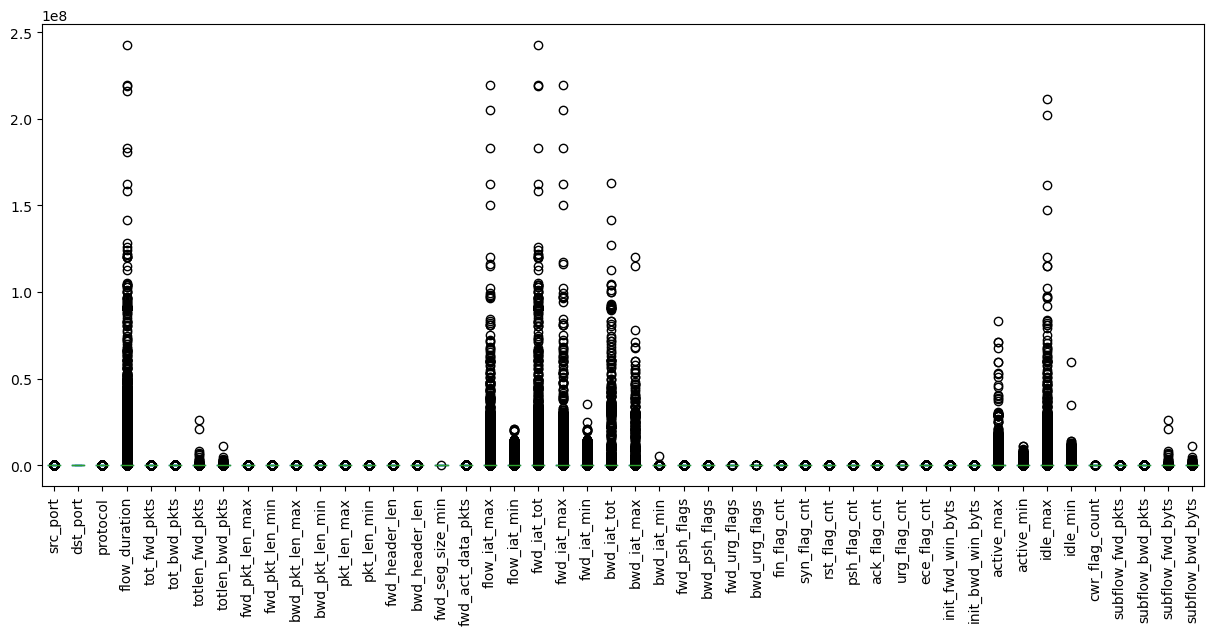

In [26]:
# Select only integer columns
int_cols = df_deduped.select_dtypes(include=[int])

# Plot box plots for integer columns
int_cols.plot(kind='box', subplots=False, figsize=(15, 6), rot=90)

# Show the plot
plt.show()

Looking at above, We see the features with maximum outliers are

<font color='blue'>flow_duration, flow_iat_max, flow_iat_min, fwd_iat_tot, fwd_iat_max, fwd_iat_min
bwd_iat_tot, bwd_iat_max
active_max, active_min
idle_max, idke_min
subflow_fwd_byts, subflow_bwd_byts</font>

<font color='darkblue'>Plotting for Floats</font>

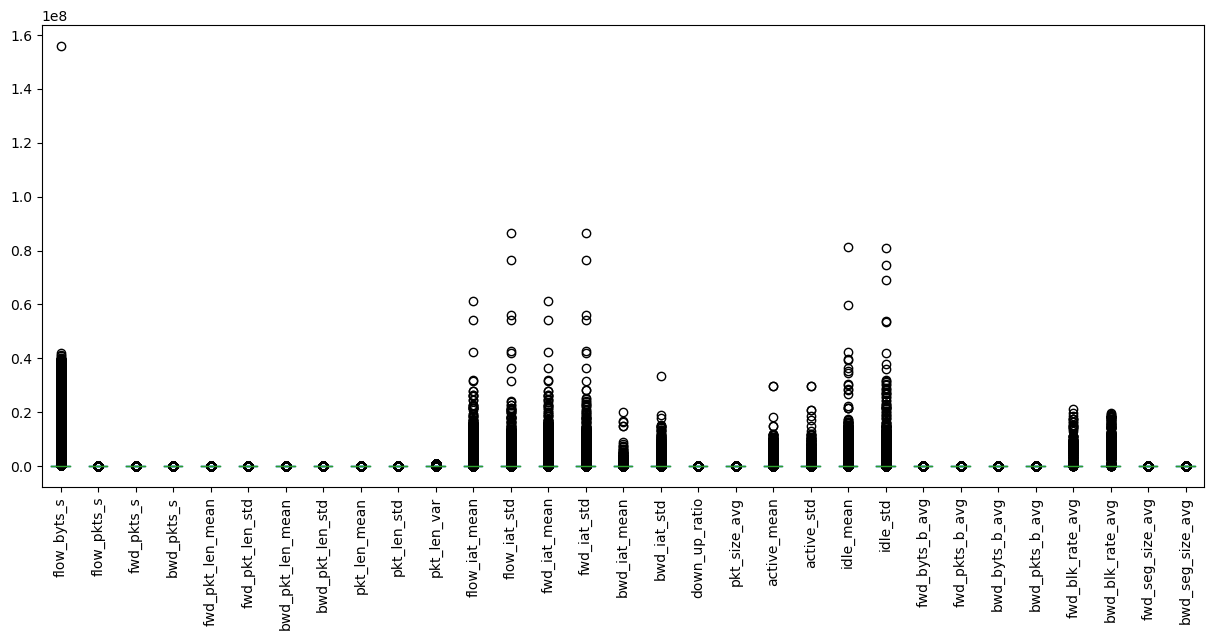

In [27]:
# Select only integer columns
int_cols = df_deduped.select_dtypes(include=[float])

# Plot box plots for integer columns
int_cols.plot(kind='box', subplots=False, figsize=(15, 6), rot=90)

# Show the plot
plt.show()

Looking at above, We see the features with maximum outliers are <br>

<font color='blue'>flow_byts_s, flow_iat_mean, flow_iat_std
fwd_iat_mean, fwd_iat_std
bwd_iat_mean, bwd_iat_std
active_mean, active_std
idle_mean, idle_std
fwd_blk_rate_avg, bwd_blk_rate_avg</font>

<font color='darkblue'>Also, checking for Unique IP address values for Source and Destination. We will use Label encoding to convert these features into numerical for our modelling.</font>

In [28]:
print("Unique Source IP: "+str(df_deduped['src_ip'].nunique())+" Unique Destination IP: "+str(df_deduped['dst_ip'].nunique()))

Unique Source IP: 42128 Unique Destination IP: 295


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_deduped['src_ip_enc'] = le.fit_transform(df_deduped['src_ip'])
df_deduped['dst_ip_enc'] = le.fit_transform(df_deduped['dst_ip'])

In [30]:
df_deduped[['src_ip_enc', 'dst_ip_enc']].head(10)

,src_ip_enc,dst_ip_enc
0,26315,171
1,26315,171
2,26315,171
3,26315,171
4,26315,171
5,26315,171
6,26315,171
7,26315,171
8,26315,171
9,26315,171


<font color='darkblue'>Applying Scaling to all Features with outliers including both integer and floats</font>

In [31]:
# List of columns to scale
columns_to_scale = ['flow_duration', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_tot', 'bwd_iat_max',
'active_max', 'active_min', 'idle_max', 'idle_min', 'subflow_fwd_byts', 'subflow_bwd_byts', 'flow_byts_s', 'flow_iat_mean', 'flow_iat_std',
'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_mean','bwd_iat_std', 'active_mean', 'active_std', 'idle_mean', 'idle_std','fwd_blk_rate_avg', 
'bwd_blk_rate_avg']

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the specified columns
scaled_data = scaler.fit_transform(df_deduped[columns_to_scale])

# Create new columns for scaled data
for i, col in enumerate(columns_to_scale):
    scaled_col = col + '_scaled'
    df_deduped[scaled_col] = scaled_data[:, i]

df_deduped.head()

,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,...,fwd_iat_mean_scaled,fwd_iat_std_scaled,bwd_iat_mean_scaled,bwd_iat_std_scaled,active_mean_scaled,active_std_scaled,idle_mean_scaled,idle_std_scaled,fwd_blk_rate_avg_scaled,bwd_blk_rate_avg_scaled
0,192.168.0.13,210.89.164.90,1649,52330,6,7/25/19 0:20,31304203,10.350048,0.191668,0.191668,...,2.722402,4.564063,-0.032312,-0.04049,-0.084355,-0.07402,4.553139,5.186786,-0.036402,-0.042283
1,192.168.0.13,210.89.164.90,8884,52330,6,7/25/19 0:20,32364994,8.342347,0.154488,0.154488,...,3.605416,2.306310,-0.032312,-0.04049,-0.084355,-0.07402,3.751776,0.421199,-0.036402,-0.042283
2,192.168.0.13,210.89.164.90,2215,52330,6,7/25/19 0:20,14809181,14.585547,0.270103,0.270103,...,2.083471,1.238603,-0.032312,-0.04049,-0.084355,-0.07402,2.099981,0.078638,-0.036402,-0.042283
3,192.168.0.13,210.89.164.90,5839,52330,6,7/25/19 0:20,23762529,6.817456,0.126249,0.126249,...,5.433773,-0.031880,-0.032312,-0.04049,-0.084355,-0.07402,-0.259177,-0.216566,-0.036402,-0.042283
4,192.168.0.13,210.89.164.90,1657,52330,6,7/25/19 0:20,20070168,10.762242,0.199301,0.199301,...,2.929462,2.616245,-0.032312,-0.04049,-0.084355,-0.07402,1.717314,2.728198,-0.036402,-0.042283


<font color='darkblue'> Plotting Boxplots after Scaling for all Float Features as all scaled features are of dtype Float </font>

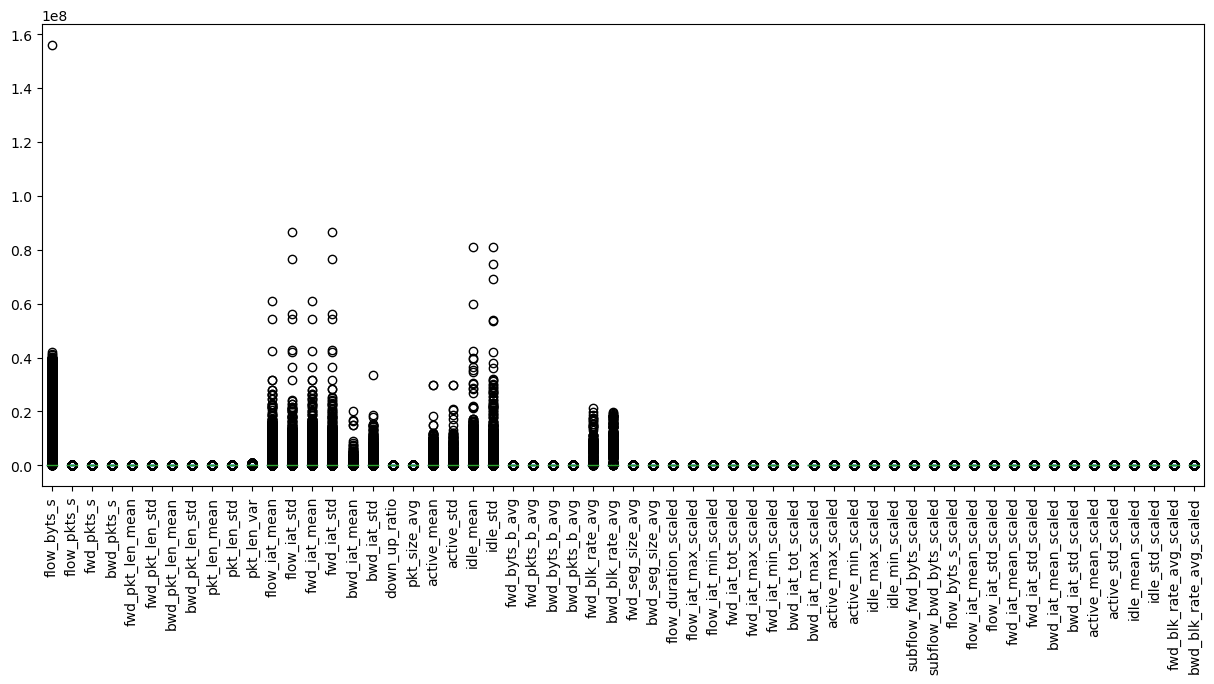

In [32]:
# Select only integer columns
int_cols = df_deduped.select_dtypes(include=[float])

# Plot box plots for integer columns
int_cols.plot(kind='box', subplots=False, figsize=(15, 6), rot=90)

# Show the plot
plt.show()

<font color='darkblue'> We see all the new scaled columns are not having any outliers. We can safely drop the original columns </font>

<font color='darkblue'>Create a new DF with only relevant columns</font>

In [33]:
columns_to_drop = ['flow_duration', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_tot', 'bwd_iat_max',
'active_max', 'active_min', 'idle_max', 'idle_min', 'subflow_fwd_byts', 'subflow_bwd_byts', 'flow_byts_s', 'flow_iat_mean', 'flow_iat_std',
'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_mean','bwd_iat_std', 'active_mean', 'active_std', 'idle_mean', 'idle_std','fwd_blk_rate_avg', 
'bwd_blk_rate_avg']
df_deduped_scaled = df_deduped.drop(columns_to_drop, axis=1)
df_deduped_scaled.head()

,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,...,fwd_iat_mean_scaled,fwd_iat_std_scaled,bwd_iat_mean_scaled,bwd_iat_std_scaled,active_mean_scaled,active_std_scaled,idle_mean_scaled,idle_std_scaled,fwd_blk_rate_avg_scaled,bwd_blk_rate_avg_scaled
0,192.168.0.13,210.89.164.90,1649,52330,6,7/25/19 0:20,0.191668,0.191668,0.0,6,...,2.722402,4.564063,-0.032312,-0.04049,-0.084355,-0.07402,4.553139,5.186786,-0.036402,-0.042283
1,192.168.0.13,210.89.164.90,8884,52330,6,7/25/19 0:20,0.154488,0.154488,0.0,5,...,3.605416,2.306310,-0.032312,-0.04049,-0.084355,-0.07402,3.751776,0.421199,-0.036402,-0.042283
2,192.168.0.13,210.89.164.90,2215,52330,6,7/25/19 0:20,0.270103,0.270103,0.0,4,...,2.083471,1.238603,-0.032312,-0.04049,-0.084355,-0.07402,2.099981,0.078638,-0.036402,-0.042283
3,192.168.0.13,210.89.164.90,5839,52330,6,7/25/19 0:20,0.126249,0.126249,0.0,3,...,5.433773,-0.031880,-0.032312,-0.04049,-0.084355,-0.07402,-0.259177,-0.216566,-0.036402,-0.042283
4,192.168.0.13,210.89.164.90,1657,52330,6,7/25/19 0:20,0.199301,0.199301,0.0,4,...,2.929462,2.616245,-0.032312,-0.04049,-0.084355,-0.07402,1.717314,2.728198,-0.036402,-0.042283


In [34]:
## delete the deduped df to release memory
del df_deduped

#### <font color='green'> Plotting Traffic Counts by Source and Destination Port Ranges</font>

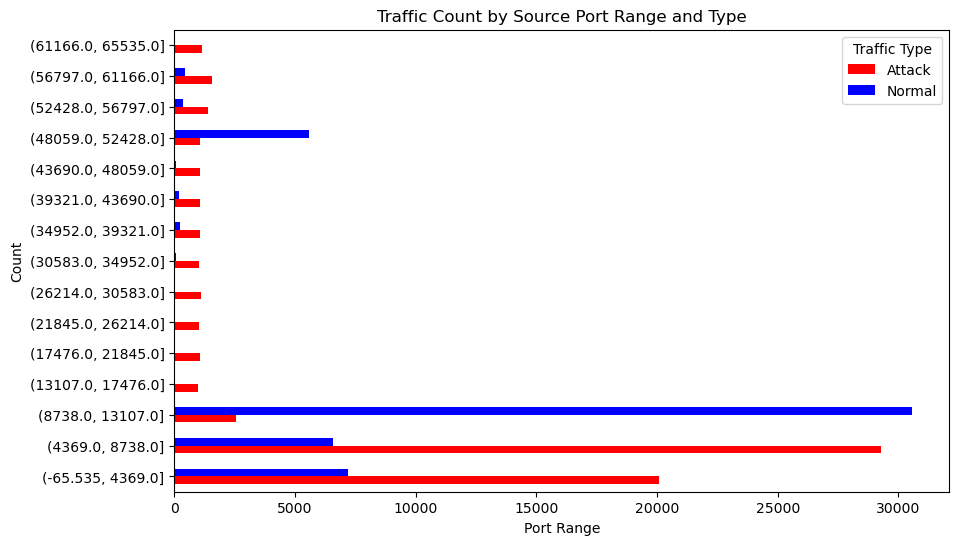

In [35]:
# Group port numbers into 15 ranges
port_ranges = pd.cut(df_deduped_scaled['src_port'], bins=15)

# Count the number of traffic by attack or normal types
traffic_count = df_deduped_scaled.groupby([port_ranges, 'label']).size().unstack()


traffic_count.plot(kind='barh', color=['blue' if x == 'Normal' else 'red' for x in traffic_count.columns], figsize=(10, 6))
plt.xlabel('Port Range')
plt.ylabel('Count')
plt.title('Traffic Count by Source Port Range and Type')
plt.legend(title='Traffic Type')
plt.show()

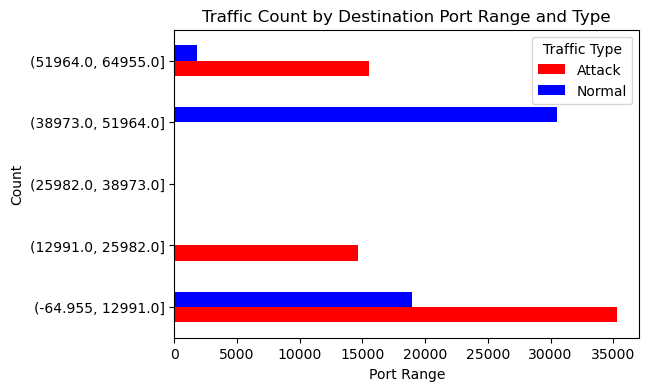

In [36]:
# Group port numbers into 15 ranges
port_ranges = pd.cut(df_deduped_scaled['dst_port'], bins=5)

# Count the number of traffic by attack or normal types
traffic_count = df_deduped_scaled.groupby([port_ranges, 'label']).size().unstack()


traffic_count.plot(kind='barh', color=['blue' if x == 'Normal' else 'red' for x in traffic_count.columns], figsize=(6, 4))
plt.xlabel('Port Range')
plt.ylabel('Count')
plt.title('Traffic Count by Destination Port Range and Type')
plt.legend(title='Traffic Type')
plt.show()

<font color='darkblue'>Perform Encoding for Port Numbers as well</font>

In [37]:
le = LabelEncoder()
df_deduped_scaled['src_port_enc'] = le.fit_transform(df_deduped_scaled['src_port'])
df_deduped_scaled['dst_port_enc'] = le.fit_transform(df_deduped_scaled['dst_port'])

In [38]:
df_deduped_scaled[['src_port_enc','dst_port_enc']].head()

,src_port_enc,dst_port_enc
0,659,257
1,7894,257
2,1225,257
3,4849,257
4,667,257


<font color='darkblue'>Drop unnecessary columns</font>

In [39]:
columns_to_drop = ['src_ip', 'dst_ip', 'src_port', 'dst_port', 'timestamp', 'timestamp_clean']
df_deduped_scaled = df_deduped_scaled.drop(columns_to_drop, axis=1)
df_deduped_scaled.head()

,protocol,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,bwd_iat_mean_scaled,bwd_iat_std_scaled,active_mean_scaled,active_std_scaled,idle_mean_scaled,idle_std_scaled,fwd_blk_rate_avg_scaled,bwd_blk_rate_avg_scaled,src_port_enc,dst_port_enc
0,6,0.191668,0.191668,0.0,6,0,324,0,54,54,...,-0.032312,-0.04049,-0.084355,-0.07402,4.553139,5.186786,-0.036402,-0.042283,659,257
1,6,0.154488,0.154488,0.0,5,0,270,0,54,54,...,-0.032312,-0.04049,-0.084355,-0.07402,3.751776,0.421199,-0.036402,-0.042283,7894,257
2,6,0.270103,0.270103,0.0,4,0,216,0,54,54,...,-0.032312,-0.04049,-0.084355,-0.07402,2.099981,0.078638,-0.036402,-0.042283,1225,257
3,6,0.126249,0.126249,0.0,3,0,162,0,54,54,...,-0.032312,-0.04049,-0.084355,-0.07402,-0.259177,-0.216566,-0.036402,-0.042283,4849,257
4,6,0.199301,0.199301,0.0,4,0,216,0,54,54,...,-0.032312,-0.04049,-0.084355,-0.07402,1.717314,2.728198,-0.036402,-0.042283,667,257


<font color='darkblue'>Validating available protocols</font>

In [40]:
df_deduped_scaled['protocol'].unique()

array([ 6, 17,  0])

In [41]:
df_deduped_scaled.columns[df_deduped_scaled.isna().sum() > 0]

Index([], dtype='object')

In [42]:
df_deduped_scaled['protocol'].value_counts()

protocol
6     116251
17       599
0         28
Name: count, dtype: int64

In [43]:
protocol_dict = {0:'IPv6 Hop-by-Hop Option (HOPOPT)',6:'Transmission Control (TCP)', 17:'User Datagram (UDP)'}
df_deduped_scaled['protocol_name'] = df_deduped_scaled['protocol'].map(protocol_dict)
df_deduped_scaled[['protocol_name']].head()

,protocol_name
0,Transmission Control (TCP)
1,Transmission Control (TCP)
2,Transmission Control (TCP)
3,Transmission Control (TCP)
4,Transmission Control (TCP)


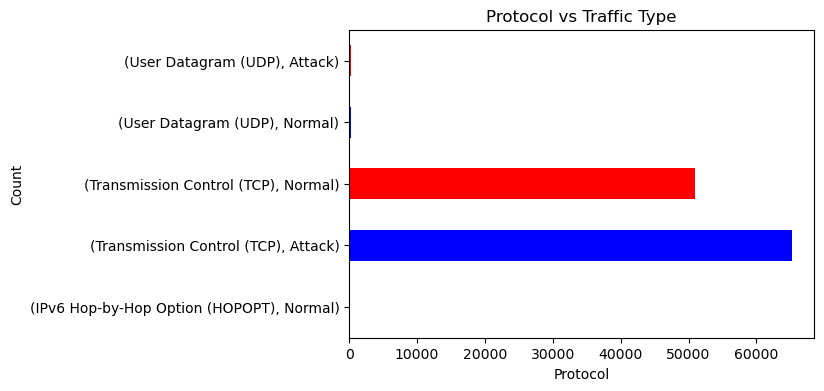

In [44]:
# Get the count of each label for each protocol
counts = df_deduped_scaled.groupby('protocol_name')['label'].value_counts()

counts.plot(kind='barh', stacked=True, color=['blue' if x == 'Normal' else 'red' for x in traffic_count.columns], figsize=(6, 4))
plt.title('Protocol vs Traffic Type')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

<font color='darkblue'>We see that UDP and HOPOPT traffic is negligible, so we will remove them from our data so that we can drop protocol feature. </font>

In [45]:
df_deduped_scaled = df_deduped_scaled[(df_deduped_scaled['protocol'] != 0) & (df_deduped_scaled['protocol'] != 17)]
df_deduped_scaled['protocol'].value_counts()

protocol
6    116251
Name: count, dtype: int64

<font color='darkblue'>As there is only 1 protocol to focus on, we will drop protocol and protocol names from our Dataframe.</font>

In [46]:
df_deduped_scaled = df_deduped_scaled.drop(['protocol', 'protocol_name'], axis=1)
df_deduped_scaled.head()

,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,...,bwd_iat_mean_scaled,bwd_iat_std_scaled,active_mean_scaled,active_std_scaled,idle_mean_scaled,idle_std_scaled,fwd_blk_rate_avg_scaled,bwd_blk_rate_avg_scaled,src_port_enc,dst_port_enc
0,0.191668,0.191668,0.0,6,0,324,0,54,54,54.0,...,-0.032312,-0.04049,-0.084355,-0.07402,4.553139,5.186786,-0.036402,-0.042283,659,257
1,0.154488,0.154488,0.0,5,0,270,0,54,54,54.0,...,-0.032312,-0.04049,-0.084355,-0.07402,3.751776,0.421199,-0.036402,-0.042283,7894,257
2,0.270103,0.270103,0.0,4,0,216,0,54,54,54.0,...,-0.032312,-0.04049,-0.084355,-0.07402,2.099981,0.078638,-0.036402,-0.042283,1225,257
3,0.126249,0.126249,0.0,3,0,162,0,54,54,54.0,...,-0.032312,-0.04049,-0.084355,-0.07402,-0.259177,-0.216566,-0.036402,-0.042283,4849,257
4,0.199301,0.199301,0.0,4,0,216,0,54,54,54.0,...,-0.032312,-0.04049,-0.084355,-0.07402,1.717314,2.728198,-0.036402,-0.042283,667,257


In [47]:
df_deduped_scaled.shape

(116251, 81)

<font color='darkblue'> Convert Target variable Label to Binary before correlation matrix </font>

In [48]:
df_deduped_scaled['label'] = df_deduped_scaled['label'].map({'Normal': 0, 'Attack': 1})

#### <font color='green'>We have 81 features, need to reduce, lets plot a correlation matrix </font>

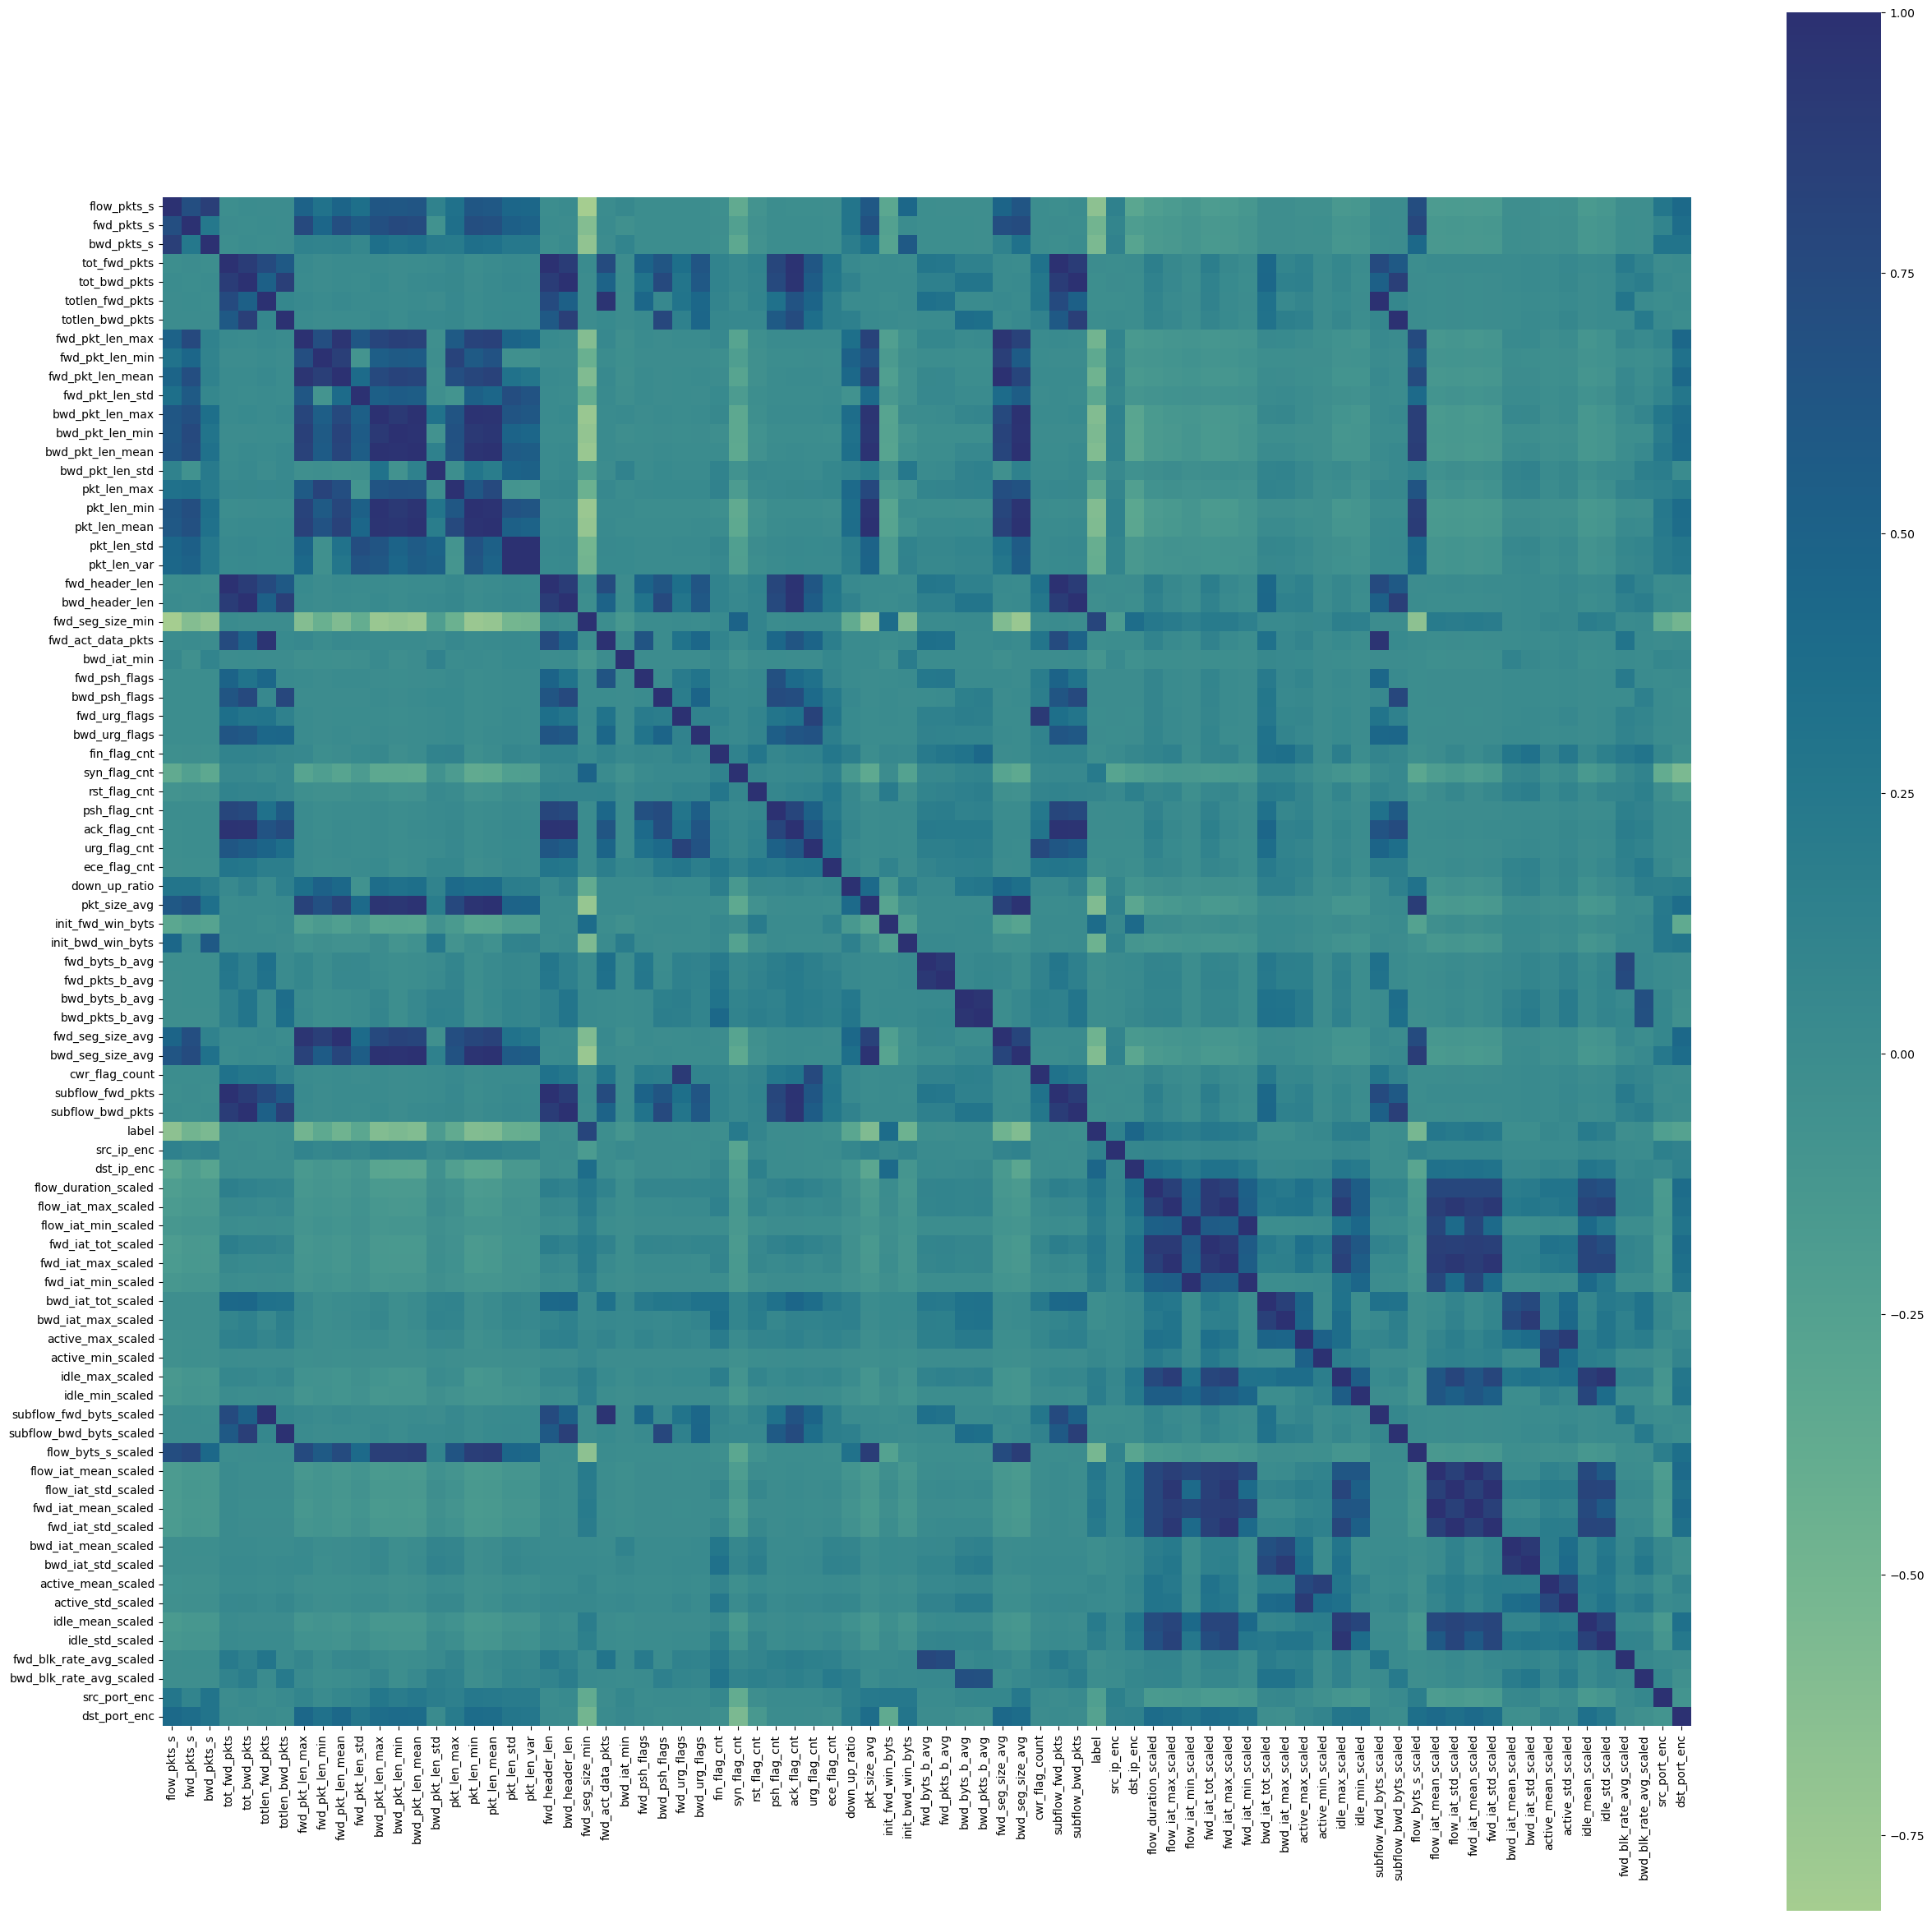

In [49]:
corr_matrix = df_deduped_scaled.corr()
fig = plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix,square = True,cmap='crest')
plt.show()

<font color='darkblue'> Print Feature names with highest correlation</font>

In [50]:
# Get the upper triangular part of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1))

# Find the column pairs with correlation greater than 0.85
high_corr_cols = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > 0.85)]

print("Columns with correlation > 0.85:")
print(high_corr_cols)

Columns with correlation > 0.85:
['bwd_pkts_s', 'tot_bwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_mean', 'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'pkt_len_min', 'pkt_len_mean', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len', 'fwd_act_data_pkts', 'ack_flag_cnt', 'pkt_size_avg', 'fwd_pkts_b_avg', 'bwd_pkts_b_avg', 'fwd_seg_size_avg', 'bwd_seg_size_avg', 'cwr_flag_count', 'subflow_fwd_pkts', 'subflow_bwd_pkts', 'flow_iat_max_scaled', 'fwd_iat_tot_scaled', 'fwd_iat_max_scaled', 'fwd_iat_min_scaled', 'bwd_iat_max_scaled', 'idle_max_scaled', 'subflow_fwd_byts_scaled', 'subflow_bwd_byts_scaled', 'flow_byts_s_scaled', 'flow_iat_mean_scaled', 'flow_iat_std_scaled', 'fwd_iat_mean_scaled', 'fwd_iat_std_scaled', 'bwd_iat_std_scaled', 'active_mean_scaled', 'active_std_scaled', 'idle_mean_scaled', 'idle_std_scaled']


<font color='darkblue'> We have a lot of features that have a correlation of more than 0.85. We will drop these columns from our dataset. </font>

In [51]:
columns_to_drop = high_corr_cols
df_deduped_scaled = df_deduped_scaled.drop(columns_to_drop, axis=1)
df_deduped_scaled.head()

,flow_pkts_s,fwd_pkts_s,tot_fwd_pkts,totlen_fwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_std,pkt_len_max,...,flow_iat_min_scaled,bwd_iat_tot_scaled,active_max_scaled,active_min_scaled,idle_min_scaled,bwd_iat_mean_scaled,fwd_blk_rate_avg_scaled,bwd_blk_rate_avg_scaled,src_port_enc,dst_port_enc
0,0.191668,0.191668,6,324,54,54,0.0,0,0.0,54,...,0.375807,-0.042246,-0.077943,-0.069075,2.088624,-0.032312,-0.036402,-0.042283,659,257
1,0.154488,0.154488,5,270,54,54,0.0,0,0.0,54,...,2.444753,-0.042246,-0.077943,-0.069075,6.831558,-0.032312,-0.036402,-0.042283,7894,257
2,0.270103,0.270103,4,216,54,54,0.0,0,0.0,54,...,2.744685,-0.042246,-0.077943,-0.069075,3.955142,-0.032312,-0.036402,-0.042283,1225,257
3,0.126249,0.126249,3,162,54,54,0.0,0,0.0,54,...,11.283173,-0.042246,-0.077943,-0.069075,-0.203859,-0.032312,-0.036402,-0.042283,4849,257
4,0.199301,0.199301,4,216,54,54,0.0,0,0.0,54,...,0.305993,-0.042246,-0.077943,-0.069075,0.375804,-0.032312,-0.036402,-0.042283,667,257


<font color='darkblue'>Our Feature size has reduced to 42, we want to still reduce it further, so we will try to use feature importance methods using different libraries for Feature selection</font>

In [52]:
df_deduped_scaled.columns

Index(['flow_pkts_s', 'fwd_pkts_s', 'tot_fwd_pkts', 'totlen_fwd_pkts',
       'fwd_pkt_len_max', 'fwd_pkt_len_min', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_std',
       'fwd_seg_size_min', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt',
       'rst_flag_cnt', 'psh_flag_cnt', 'urg_flag_cnt', 'ece_flag_cnt',
       'down_up_ratio', 'init_fwd_win_byts', 'init_bwd_win_byts',
       'fwd_byts_b_avg', 'bwd_byts_b_avg', 'label', 'src_ip_enc', 'dst_ip_enc',
       'flow_duration_scaled', 'flow_iat_min_scaled', 'bwd_iat_tot_scaled',
       'active_max_scaled', 'active_min_scaled', 'idle_min_scaled',
       'bwd_iat_mean_scaled', 'fwd_blk_rate_avg_scaled',
       'bwd_blk_rate_avg_scaled', 'src_port_enc', 'dst_port_enc'],
      dtype='object')

#### <font color='green'> Plotting Feature Importance to find top 20 features for modelling </font>

<font color='darkblue'> Using Random Forest Classifier to find feature Importance </font>

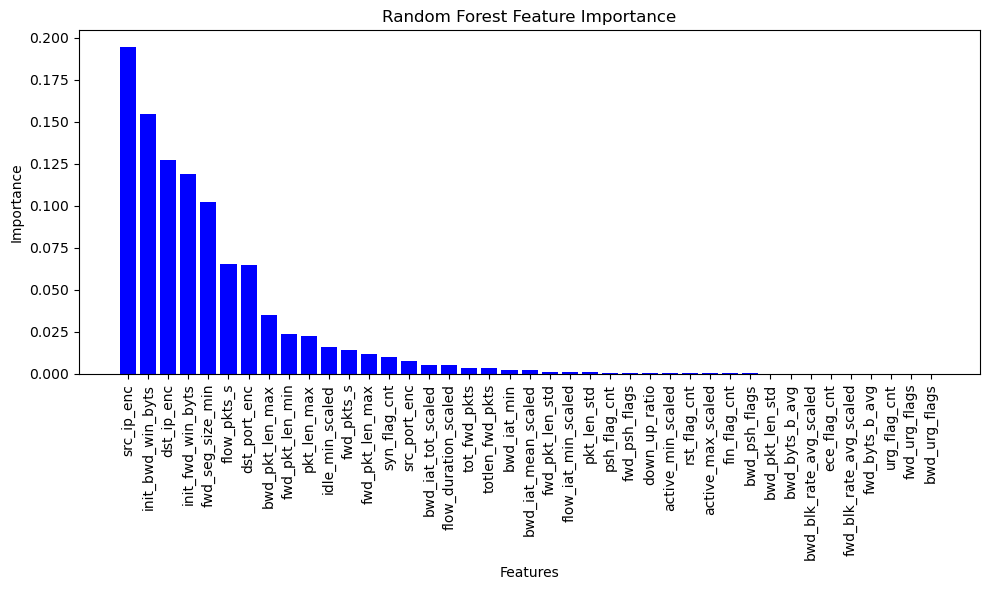

In [53]:
# Separate features and target variable
X = df_deduped_scaled.drop('label', axis=1)
y = df_deduped_scaled['label']

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit RandomForestClassifier to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation=90)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

<font color='darkblue'> Using XGB Classifier to find feature Importance </font>

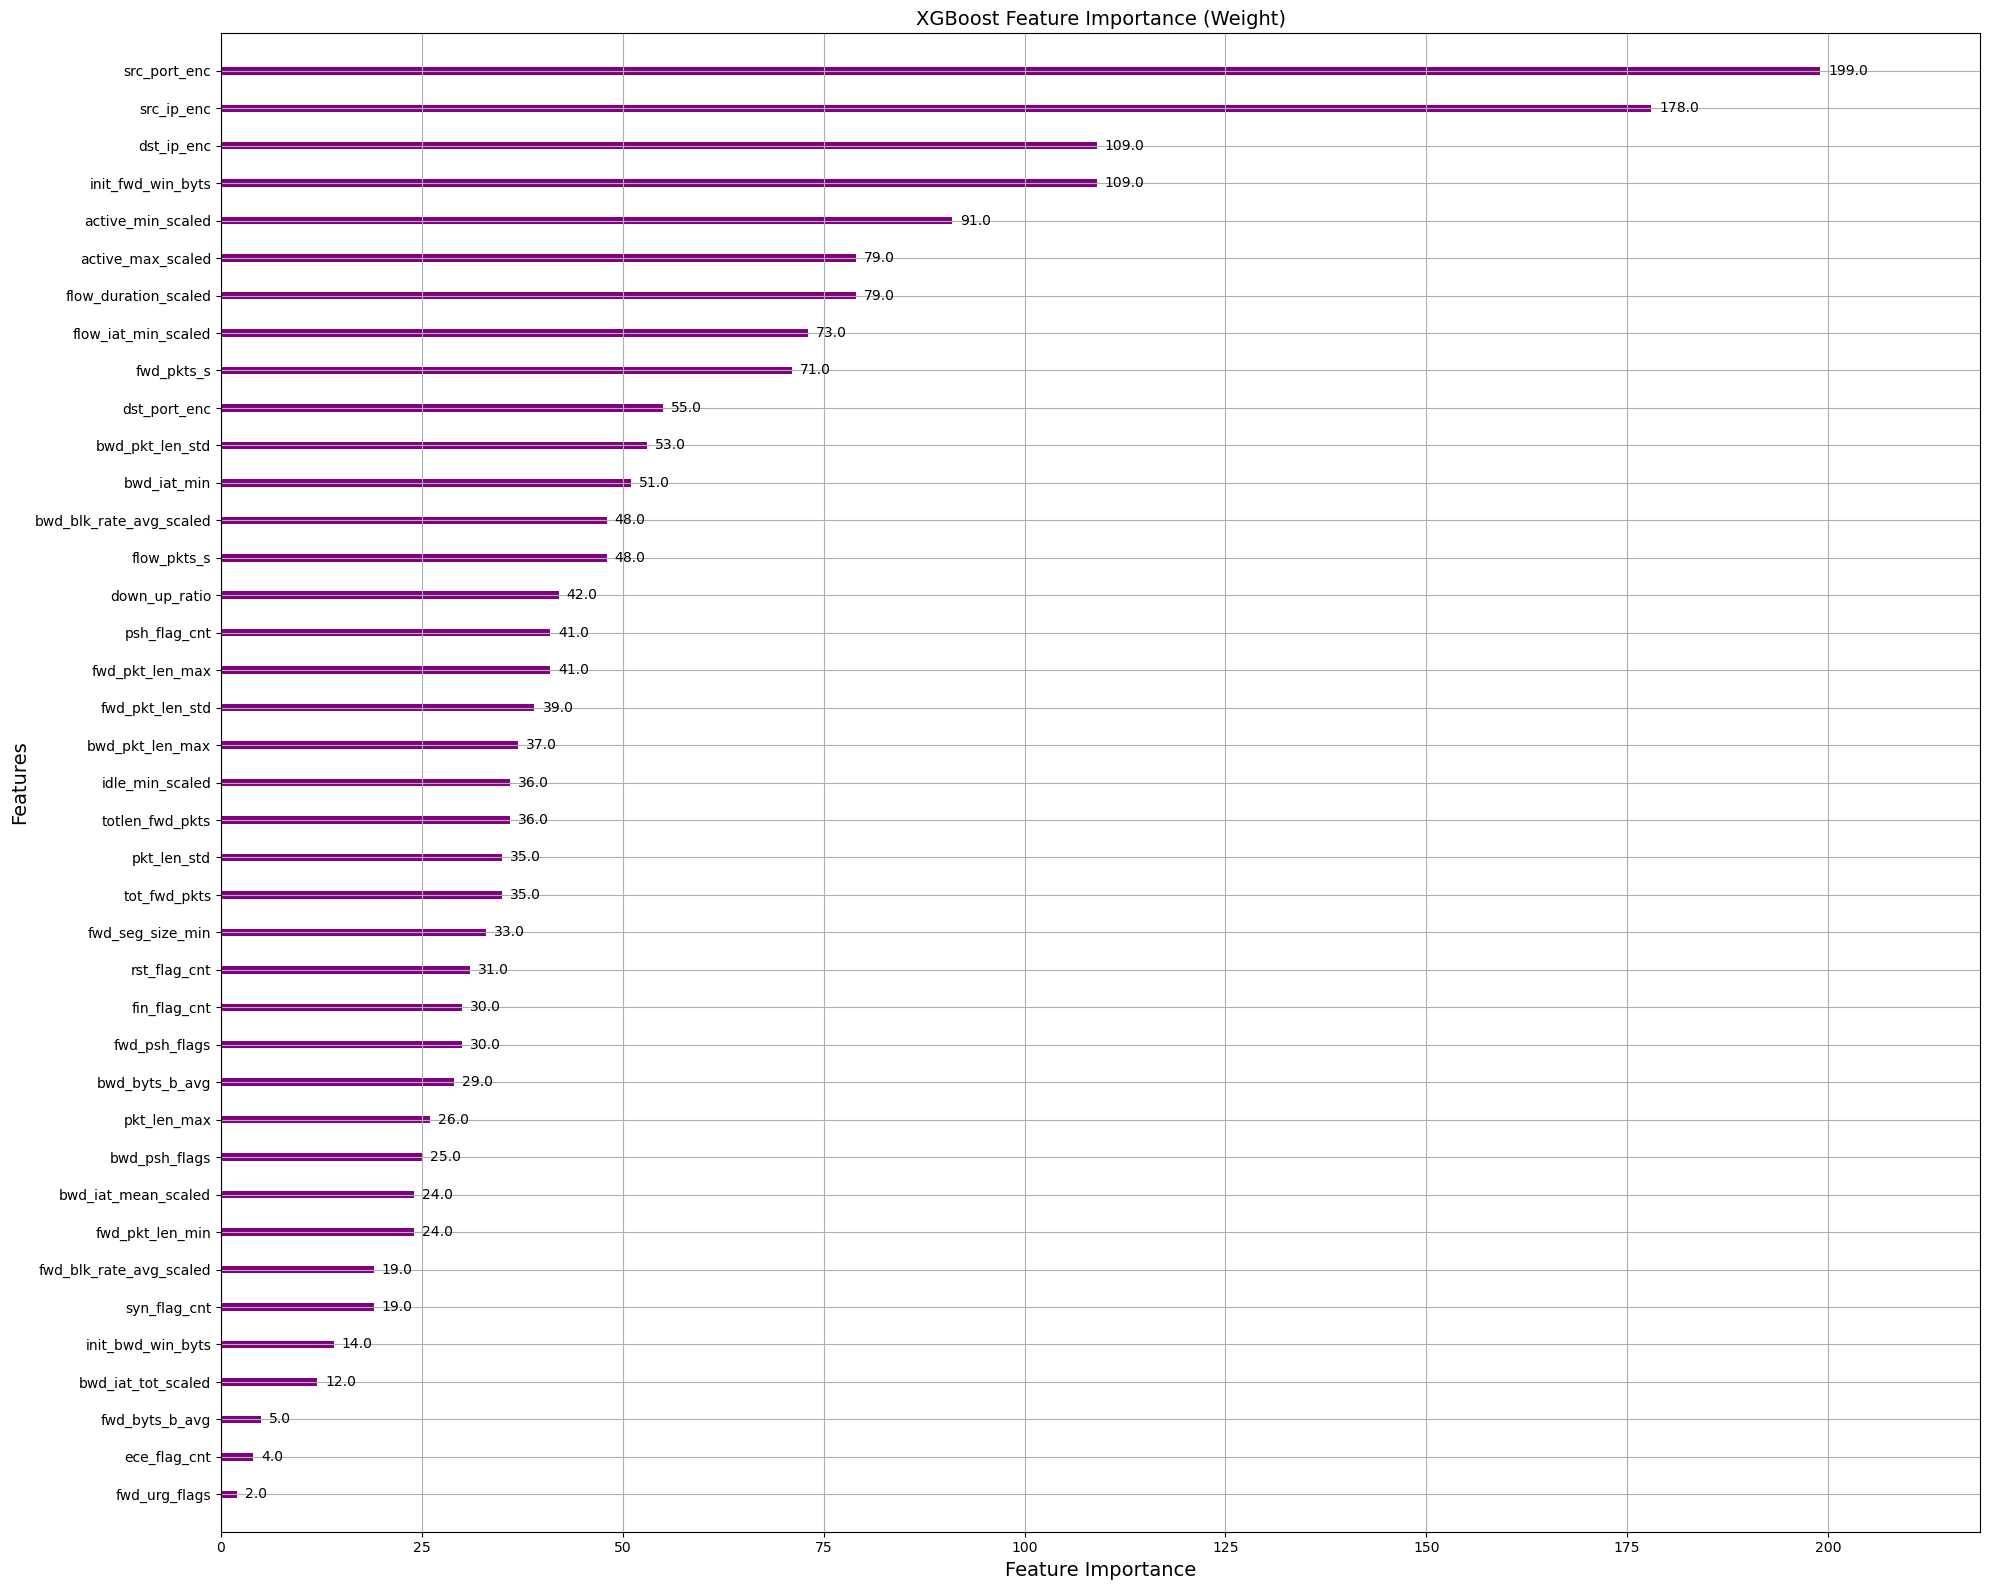

In [54]:
# Separate features and target variable
X = df_deduped_scaled.drop('label', axis=1)
y = df_deduped_scaled['label']

# Initialize XGBoost model
model = xgb.XGBClassifier()

# Fit the model to the data
model.fit(X, y)

# Plot feature importance
xgb.plot_importance(model, importance_type='weight', xlabel='Weight', ylabel='Features', title='XGBoost Feature Importance (Weight)', color='purple')  # Customize bar color
plt.gcf().set_size_inches(20, 16)
plt.xlabel('Feature Importance', fontsize=14)  # Adjust font size for x-axis label
plt.ylabel('Features', fontsize=14)  # Adjust font size for y-axis label
plt.title('XGBoost Feature Importance (Weight)', fontsize=14)  # Adjust font size for title
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

#### <font color='green'> Find Top 20 Features by combinging results from XGBoost and Random Forest and taking average </font>

In [55]:
rf_importances = rf_classifier.feature_importances_
xgb_importances = model.feature_importances_

In [56]:
importances_df = pd.DataFrame({
	'Feature': X.columns,
	'XGB Importance': xgb_importances,
	'RF Importance': rf_importances
})

In [57]:
importances_df['Average Importance'] = (importances_df['XGB Importance'] + importances_df['RF Importance']) / 2
importances_df = importances_df.sort_values('Average Importance', ascending=False)

In [58]:
print(importances_df)

                    Feature  XGB Importance  RF Importance  Average Importance
11         fwd_seg_size_min        0.540941       0.102409            0.321675
25        init_bwd_win_byts        0.326176       0.154762            0.240469
28               src_ip_enc        0.025919       0.194704            0.110311
29               dst_ip_enc        0.072908       0.127264            0.100086
24        init_fwd_win_byts        0.000323       0.118723            0.059523
40             dst_port_enc        0.005069       0.064644            0.034856
0               flow_pkts_s        0.000145       0.065248            0.032697
9               pkt_len_max        0.018411       0.022408            0.020409
7           bwd_pkt_len_max        0.001409       0.035226            0.018317
5           fwd_pkt_len_min        0.001126       0.023734            0.012430
35          idle_min_scaled        0.000138       0.016169            0.008153
1                fwd_pkts_s        0.000095       0.

In [59]:
top_20_features = importances_df.head(20)['Feature']

In [60]:
top_20_features.head(20)

11        fwd_seg_size_min
25       init_bwd_win_byts
28              src_ip_enc
29              dst_ip_enc
24       init_fwd_win_byts
40            dst_port_enc
0              flow_pkts_s
9              pkt_len_max
7          bwd_pkt_len_max
5          fwd_pkt_len_min
35         idle_min_scaled
1               fwd_pkts_s
4          fwd_pkt_len_max
18            syn_flag_cnt
39            src_port_enc
30    flow_duration_scaled
32      bwd_iat_tot_scaled
2             tot_fwd_pkts
3          totlen_fwd_pkts
12             bwd_iat_min
Name: Feature, dtype: object

#### <font color='green'> Create final Dataframe using these Top 20 Features for Modelling </font>

In [61]:
final_df = df_deduped_scaled[top_20_features.tolist() + ['label']]

In [62]:
final_df.head()

,fwd_seg_size_min,init_bwd_win_byts,src_ip_enc,dst_ip_enc,init_fwd_win_byts,dst_port_enc,flow_pkts_s,pkt_len_max,bwd_pkt_len_max,fwd_pkt_len_min,...,fwd_pkts_s,fwd_pkt_len_max,syn_flag_cnt,src_port_enc,flow_duration_scaled,bwd_iat_tot_scaled,tot_fwd_pkts,totlen_fwd_pkts,bwd_iat_min,label
0,20,0,26315,171,4393,257,0.191668,54,0,54,...,0.191668,54,0,659,3.750670,-0.042246,6,324,0,1
1,20,0,26315,171,6131,257,0.154488,54,0,54,...,0.154488,54,0,7894,3.889161,-0.042246,5,270,0,1
2,20,0,26315,171,7072,257,0.270103,54,0,54,...,0.270103,54,0,1225,1.597173,-0.042246,4,216,0,1
3,20,0,26315,171,5615,257,0.126249,54,0,54,...,0.126249,54,0,4849,2.766072,-0.042246,3,162,0,1
4,20,0,26315,171,2854,257,0.199301,54,0,54,...,0.199301,54,0,667,2.284018,-0.042246,4,216,0,1


In [63]:
final_df.shape

(116251, 21)

<font color='darkblue'> Checking for Outliers in Final Dataframe </font>

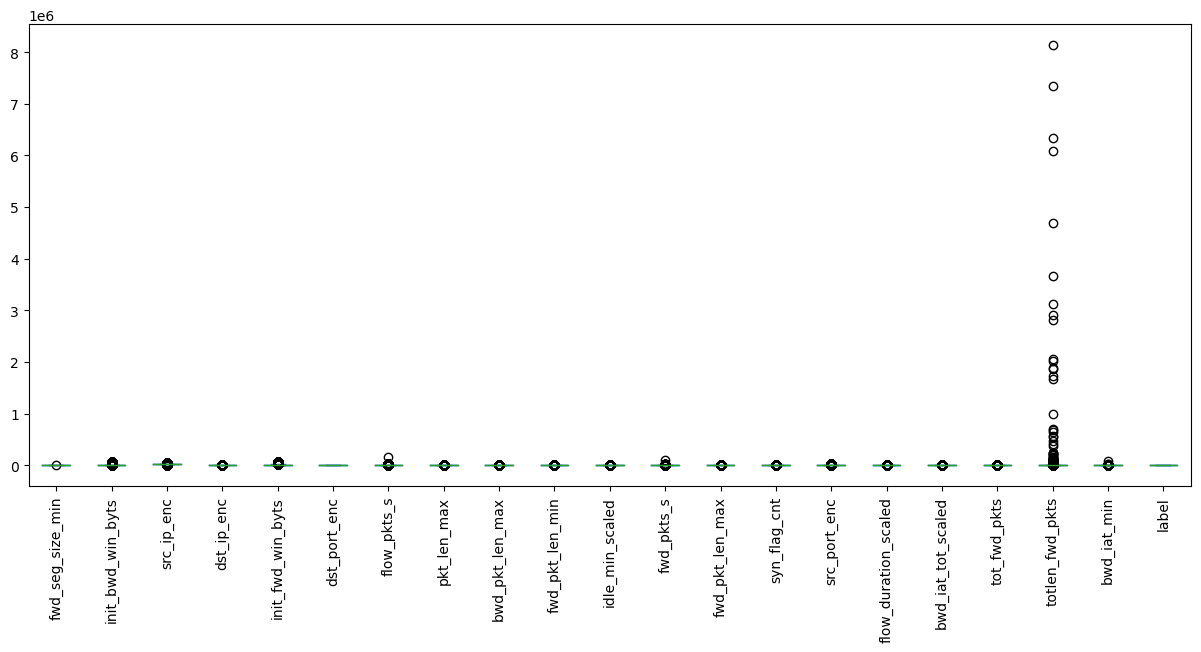

In [64]:
# Select only integer columns
int_cols = final_df.select_dtypes(include=[float,int])

# Plot box plots for integer columns
int_cols.plot(kind='box', subplots=False, figsize=(15, 6), rot=90)

# Show the plot
plt.show()

<font color='darkblue'> We see one feature "totlen_fwd_pkts" lets scale it </font>

In [65]:
# Select the feature to scale
feature_to_scale = 'totlen_fwd_pkts'

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the feature
# final_df[feature_to_scale] = scaler.fit_transform(final_df[[feature_to_scale]])
final_df.loc[:, feature_to_scale] = scaler.fit_transform(final_df[[feature_to_scale]])

<font color='darkblue'> Checking for Outliers again in Final Dataframe </font>

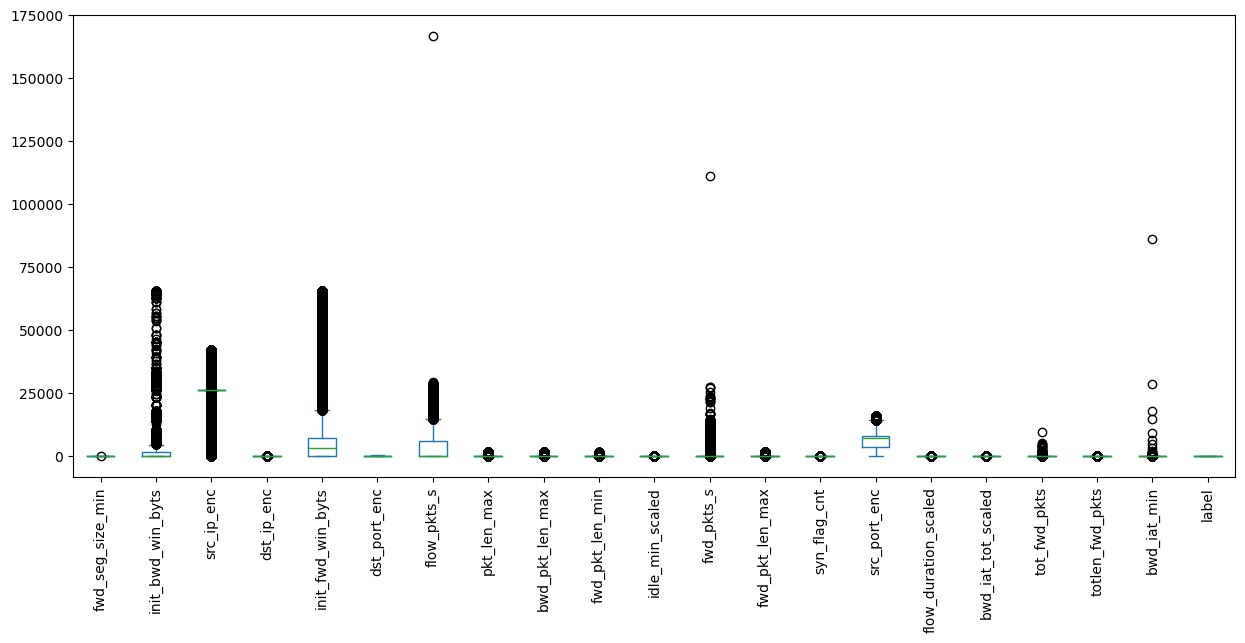

In [66]:
# Select only integer columns
int_cols = final_df.select_dtypes(include=[float,int])

# Plot box plots for integer columns
int_cols.plot(kind='box', subplots=False, figsize=(15, 6), rot=90)

# Show the plot
plt.show()

<font color='darkblue'> Still see a lot of outliers in the final DF, we will scale these as well </font>

In [67]:
# List of columns to scale
columns_to_scale = ['init_bwd_win_byts', 'src_ip_enc', 'init_fwd_win_byts', 'flow_pkts_s', 'fwd_pkts_s', 'tot_fwd_pkts','bwd_iat_min']

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the specified columns
scaled_data = scaler.fit_transform(final_df[columns_to_scale])

# Create new columns for scaled data
for i, col in enumerate(columns_to_scale):
    scaled_col = col + '_scaled'
    final_df[scaled_col] = scaled_data[:, i]

final_df.head()

/var/folders/07/qch9szx51kdgzhzp77njqrqw001f2_/T/ipykernel_20338/2118671326.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[scaled_col] = scaled_data[:, i]
/var/folders/07/qch9szx51kdgzhzp77njqrqw001f2_/T/ipykernel_20338/2118671326.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[scaled_col] = scaled_data[:, i]
/var/folders/07/qch9szx51kdgzhzp77njqrqw001f2_/T/ipykernel_20338/2118671326.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,fwd_seg_size_min,init_bwd_win_byts,src_ip_enc,dst_ip_enc,init_fwd_win_byts,dst_port_enc,flow_pkts_s,pkt_len_max,bwd_pkt_len_max,fwd_pkt_len_min,...,totlen_fwd_pkts,bwd_iat_min,label,init_bwd_win_byts_scaled,src_ip_enc_scaled,init_fwd_win_byts_scaled,flow_pkts_s_scaled,fwd_pkts_s_scaled,tot_fwd_pkts_scaled,bwd_iat_min_scaled
0,20,0,26315,171,4393,257,0.191668,54,0,54,...,-0.014950,0,1,-0.41035,0.241814,-0.256266,-0.598586,-0.464349,0.067951,-0.101093
1,20,0,26315,171,6131,257,0.154488,54,0,54,...,-0.016042,0,1,-0.41035,0.241814,-0.139621,-0.598593,-0.464361,0.048681,-0.101093
2,20,0,26315,171,7072,257,0.270103,54,0,54,...,-0.017133,0,1,-0.41035,0.241814,-0.076466,-0.598573,-0.464323,0.029412,-0.101093
3,20,0,26315,171,5615,257,0.126249,54,0,54,...,-0.018225,0,1,-0.41035,0.241814,-0.174252,-0.598598,-0.464370,0.010143,-0.101093
4,20,0,26315,171,2854,257,0.199301,54,0,54,...,-0.017133,0,1,-0.41035,0.241814,-0.359556,-0.598585,-0.464347,0.029412,-0.101093


In [68]:
final_df.shape

(116251, 28)

<font color='darkblue'> Checking for outliers one last time </font>

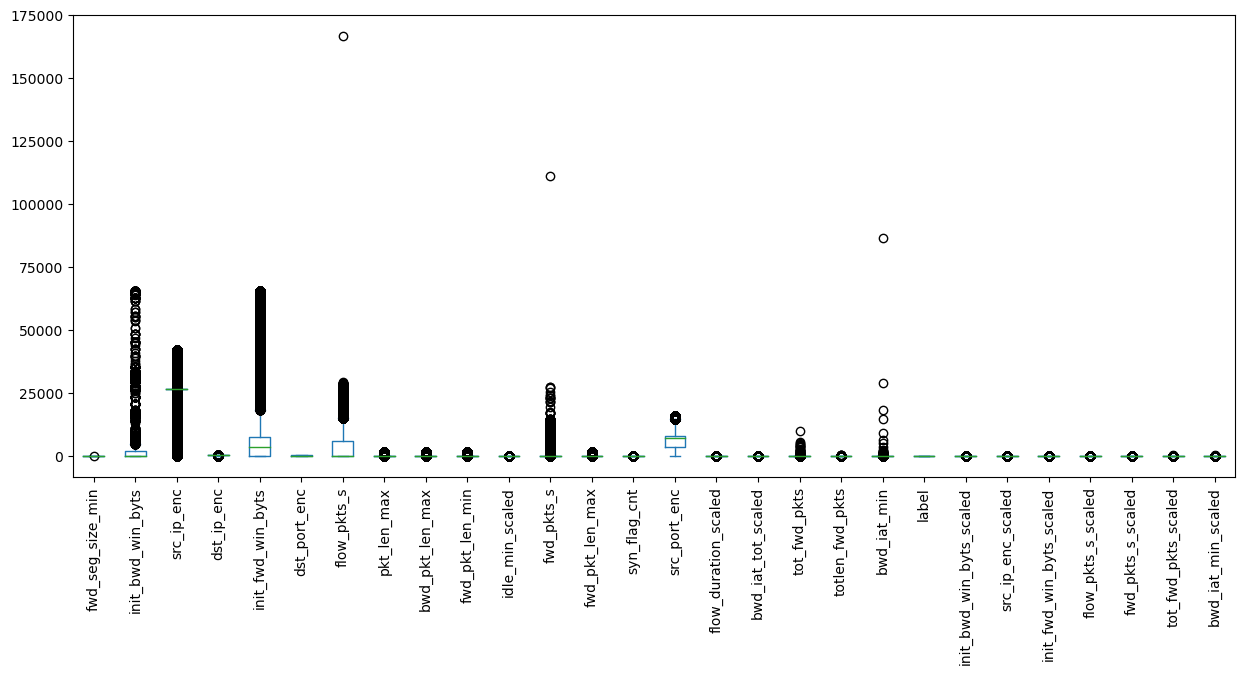

In [69]:
# Select only integer columns
int_cols = final_df.select_dtypes(include=[float,int])

# Plot box plots for integer columns
int_cols.plot(kind='box', subplots=False, figsize=(15, 6), rot=90)

# Show the plot
plt.show()

<font color='darkblue'> All scaled columns look good. We will drop all original features with outliers and retain only scaled columns </font>

In [70]:
columns_to_drop = ['init_bwd_win_byts', 'src_ip_enc', 'init_fwd_win_byts', 'flow_pkts_s', 'fwd_pkts_s', 'tot_fwd_pkts','bwd_iat_min']
final_df = final_df.drop(columns_to_drop, axis=1)

In [71]:
final_df.shape

(116251, 21)

#### <font color='green'> Creating Test, Train and Validation Splits </font>

In [72]:
# Split into training, validation, and testing sets
X = final_df.drop('label', axis=1)
y = final_df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [73]:
X_train.shape, X_val.shape, X_test.shape

((81375, 20), (17438, 20), (17438, 20))

#### <font color='green'>  Performing Logistic Regression </font>

In [75]:
# Create a logistic regression model
lr_classifier = LogisticRegression(max_iter=10000, solver='liblinear', multi_class='ovr', random_state=123)

# Train the model on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the testing data
lr_test_predictions = lr_classifier.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, lr_test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_test_predictions))
print("Accuracy:", accuracy_score(y_test, lr_test_predictions))
print("Precision:", precision_score(y_test, lr_test_predictions))
print("Recall:", recall_score(y_test, lr_test_predictions))
print("F1 Score:", f1_score(y_test, lr_test_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      7585
           1       0.94      0.99      0.97      9853

    accuracy                           0.96     17438
   macro avg       0.97      0.96      0.96     17438
weighted avg       0.96      0.96      0.96     17438

Confusion Matrix:
[[7001  584]
 [  56 9797]]
Accuracy: 0.9632985434109417
Precision: 0.9437433773239572
Recall: 0.9943164518420785
F1 Score: 0.9683700701789067


<font color='darkblue'> Hyperparameter Tuning - Logistic Regression - Tuning the parameters for Optimal model </font>

In [76]:
# Logistic Regression - Hyperparameter Tuning
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

base_model = LogisticRegression(max_iter=10000, solver='liblinear', multi_class='ovr', random_state=123)

lr_grid_search = GridSearchCV(base_model, param_grid=lr_param_grid, cv=3, scoring='accuracy')

# Hyperparameter tuning on validation dataset
lr_grid_search.fit(X_val, y_val)

lr_best_params = lr_grid_search.best_params_
lr_best_model = lr_grid_search.best_estimator_

print("Logistic Regression Best Parameters:", lr_best_params)

lr_grid_search.cv_results_
df = pd.DataFrame(lr_grid_search.cv_results_)
display(df)

Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l1'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.121036,0.008615,0.007054,0.005397,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.891106,0.892138,0.893840,0.892362,0.001127,10
1,0.529411,0.172698,0.004884,0.002414,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.900052,0.902288,0.902959,0.901766,0.001243,9
2,0.389897,0.104895,0.006097,0.003244,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.932393,0.937038,0.931865,0.933765,0.002324,8
3,0.711739,0.200773,0.002597,0.000229,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.935489,0.938242,0.932897,0.935543,0.002182,7
4,1.158819,0.177171,0.003213,0.000596,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.971615,0.975744,0.971266,0.972875,0.002034,3
5,0.793549,0.099560,0.003067,0.000709,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.952864,0.957853,0.952512,0.954410,0.002439,6
6,1.816463,0.162973,0.003969,0.000700,1,l1,"{'C': 1, 'penalty': 'l1'}",0.981421,0.981937,0.978321,0.980560,0.001597,2
7,0.956491,0.156833,0.003472,0.001658,1,l2,"{'C': 1, 'penalty': 'l2'}",0.955961,0.972820,0.963008,0.963929,0.006913,5
8,2.705082,1.485646,0.009413,0.003398,10,l1,"{'C': 10, 'penalty': 'l1'}",0.981937,0.983485,0.979525,0.981649,0.001629,1
9,1.093730,0.048998,0.005132,0.003434,10,l2,"{'C': 10, 'penalty': 'l2'}",0.962670,0.973336,0.965933,0.967313,0.004462,4


In [93]:
lr_best_model = LogisticRegression(**lr_best_params, random_state=123, solver='liblinear', max_iter=10000, multi_class='ovr')
lr_best_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000, multi_class='ovr', penalty='l1',
                   random_state=123, solver='liblinear')

In [94]:
lr_best_test_pred = lr_best_model.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, lr_best_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_best_test_pred))
print("Accuracy:", accuracy_score(y_test, lr_best_test_pred))
print("Precision:", precision_score(y_test, lr_best_test_pred))
print("Recall:", recall_score(y_test, lr_best_test_pred))
print("F1 Score:", f1_score(y_test, lr_best_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7585
           1       0.97      1.00      0.98      9853

    accuracy                           0.98     17438
   macro avg       0.98      0.98      0.98     17438
weighted avg       0.98      0.98      0.98     17438

Confusion Matrix:
[[7248  337]
 [  27 9826]]
Accuracy: 0.979126046564973
Precision: 0.9668404998524058
Recall: 0.9972597178524307
F1 Score: 0.981814548361311


### <font color='green'> Performing SVM </font>

In [79]:
# Create an SVM object
svm_classifier = LinearSVC(dual=False, max_iter=10000)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
svm_class_test_pred = svm_classifier.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, svm_class_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_class_test_pred))
print("Accuracy:", accuracy_score(y_test, svm_class_test_pred))
print("Precision:", precision_score(y_test, svm_class_test_pred))
print("Recall:", recall_score(y_test, svm_class_test_pred))
print("F1 Score:", f1_score(y_test, svm_class_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      7585
           1       0.94      1.00      0.97      9853

    accuracy                           0.96     17438
   macro avg       0.97      0.96      0.96     17438
weighted avg       0.96      0.96      0.96     17438

Confusion Matrix:
[[6978  607]
 [  38 9815]]
Accuracy: 0.9630118132813396
Precision: 0.9417578199961619
Recall: 0.9961433066071247
F1 Score: 0.9681874229346485


<font color='darkblue'> Hyperparameter Tuning - SVM - Trying to tune to find optimal parameters</font>

In [81]:
svm_param_grid = {
    'C': [10, 100, 500],
    'max_iter': [10000],
    'penalty': ['l2', 'l1']
}

base_model = LinearSVC(dual=False)

svm_grid_search = GridSearchCV(base_model, param_grid=svm_param_grid, cv=3, scoring='accuracy')

# Hyperparameter tuning on training dataset with cross-validation
svm_grid_search.fit(X_val, y_val)

svm_best_params = svm_grid_search.best_params_

print("SVM Best Parameters:", svm_best_params)
svm_grid_search.cv_results_
df_svm = pd.DataFrame(svm_grid_search.cv_results_)
display(df_svm)

SVM Best Parameters: {'C': 500, 'max_iter': 10000, 'penalty': 'l1'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.838445,0.099486,0.002803,0.000074,10,10000,l2,"{'C': 10, 'max_iter': 10000, 'penalty': 'l2'}",0.960261,0.965594,0.954061,0.959972,0.004713,5
1,3.371576,0.970295,0.003264,0.001438,10,10000,l1,"{'C': 10, 'max_iter': 10000, 'penalty': 'l1'}",0.968175,0.968175,0.968685,0.968345,0.000241,3
2,0.827642,0.130983,0.005040,0.002739,100,10000,l2,"{'C': 100, 'max_iter': 10000, 'penalty': 'l2'}",0.958197,0.966971,0.955781,0.960316,0.004808,4
3,7.118915,5.863805,0.010112,0.005570,100,10000,l1,"{'C': 100, 'max_iter': 10000, 'penalty': 'l1'}",0.968347,0.967659,0.970406,0.968804,0.001167,2
4,0.688315,0.067489,0.002613,0.000402,500,10000,l2,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2'}",0.951660,0.961122,0.960943,0.957908,0.004419,6
5,4.762318,1.110995,0.002402,0.000151,500,10000,l1,"{'C': 500, 'max_iter': 10000, 'penalty': 'l1'}",0.968175,0.969895,0.969718,0.969263,0.000773,1


In [82]:
# Create the best model using the entire training set
svm_best_model = LinearSVC(**svm_best_params, random_state=123, dual=False)
svm_best_model.fit(X_train, y_train)

LinearSVC(C=500, dual=False, max_iter=10000, penalty='l1', random_state=123)

In [83]:
y_svm_test_pred = svm_best_model.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, y_svm_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_svm_test_pred))
print("Accuracy:", accuracy_score(y_test, y_svm_test_pred))
print("Precision:", precision_score(y_test, y_svm_test_pred))
print("Recall:", recall_score(y_test, y_svm_test_pred))
print("F1 Score:", f1_score(y_test, y_svm_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7585
           1       0.95      1.00      0.97      9853

    accuracy                           0.97     17438
   macro avg       0.97      0.97      0.97     17438
weighted avg       0.97      0.97      0.97     17438

Confusion Matrix:
[[7095  490]
 [  36 9817]]
Accuracy: 0.9698359903658677
Precision: 0.9524594935480741
Recall: 0.9963462904699076
F1 Score: 0.9739087301587301


### <font color='green'> Performing Random Forest</font>

In [84]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_test_preds = rf_classifier.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, rf_test_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_test_preds))
print("Accuracy:", accuracy_score(y_test, rf_test_preds))
print("Precision:", precision_score(y_test, rf_test_preds))
print("Recall:", recall_score(y_test, rf_test_preds))
print("F1 Score:", f1_score(y_test, rf_test_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7585
           1       1.00      1.00      1.00      9853

    accuracy                           1.00     17438
   macro avg       1.00      1.00      1.00     17438
weighted avg       1.00      1.00      1.00     17438

Confusion Matrix:
[[7565   20]
 [  16 9837]]
Accuracy: 0.9979355430668655
Precision: 0.9979709850867404
Recall: 0.9983761290977368
F1 Score: 0.9981735159817352


<font color='darkblue'> <b>Hyperparameter Tuning - Random Forest  - Not required, Model is performing really well</b> </font>

### <font color='green'> Performing XGBoost</font>

In [85]:
xgb_classifier = xgb.XGBClassifier(random_state=123)
xgb_classifier.fit(X_train, y_train)
xgb_test_predictions = xgb_classifier.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, xgb_test_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_test_predictions))
print("Accuracy:", accuracy_score(y_test, xgb_test_predictions))
print("Precision:", precision_score(y_test, xgb_test_predictions))
print("Recall:", recall_score(y_test, xgb_test_predictions))
print("F1 Score:", f1_score(y_test, xgb_test_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7585
           1       1.00      1.00      1.00      9853

    accuracy                           1.00     17438
   macro avg       1.00      1.00      1.00     17438
weighted avg       1.00      1.00      1.00     17438

Confusion Matrix:
[[7567   18]
 [  17 9836]]
Accuracy: 0.9979928890927858
Precision: 0.9981733306271565
Recall: 0.9982746371663452
F1 Score: 0.9982239813264322


<font color='darkblue'> <b>Hyperparameter Tuning - XGBoost - Not required Model is performing really well</b></font>

### <font color='green'> Performing Naive Bayes</font>

In [86]:
# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
nb_test_pred = nb_classifier.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, nb_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_test_pred))
print("Accuracy:", accuracy_score(y_test, nb_test_pred))
print("Precision:", precision_score(y_test, nb_test_pred))
print("Recall:", recall_score(y_test, nb_test_pred))
print("F1 Score:", f1_score(y_test, nb_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7585
           1       0.85      0.99      0.91      9853

    accuracy                           0.90     17438
   macro avg       0.92      0.88      0.89     17438
weighted avg       0.91      0.90      0.89     17438

Confusion Matrix:
[[5856 1729]
 [ 100 9753]]
Accuracy: 0.8951141185915816
Precision: 0.8494164779655112
Recall: 0.9898508068608546
F1 Score: 0.9142723224748066


<font color='darkblue'> Hyperparameter Tuning - Naive Bayes classifier to find optimal parameters</font>

In [87]:
# Perform grid search with cross-validation
param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
        'priors': [[0.5, 0.5]]
}

grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

nb_best_params = grid_search.best_params_

# Print best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
grid_search.cv_results_
df_nb = pd.DataFrame(grid_search.cv_results_)
display(df_nb)

Best Parameters: {'priors': [0.5, 0.5], 'var_smoothing': 1e-06}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056267,0.003294,0.007277,0.001075,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}",0.891244,0.894194,0.891121,0.896160,0.893579,0.893260,0.001898,4
1,0.057632,0.000336,0.009212,0.001639,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-08}",0.891736,0.895054,0.890876,0.896037,0.894378,0.893616,0.001978,3
2,0.056976,0.004659,0.007662,0.001419,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-07}",0.891797,0.894992,0.890814,0.895914,0.894992,0.893702,0.002010,2
3,0.056716,0.002038,0.009088,0.000933,"[0.5, 0.5]",0.000001,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-06}",0.891797,0.894992,0.890998,0.896221,0.894992,0.893800,0.002028,1
4,0.058635,0.004084,0.008650,0.001435,"[0.5, 0.5]",0.00001,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-05}",0.793364,0.797604,0.793487,0.797788,0.795269,0.795502,0.001915,5


In [88]:
# Create the best model using the entire training set
nb_best_model = GaussianNB(**nb_best_params)
nb_best_model.fit(X_train, y_train)

GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-06)

In [89]:
y_nb_test_pred = nb_best_model.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, y_nb_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_nb_test_pred))
print("Accuracy:", accuracy_score(y_test, y_nb_test_pred))
print("Precision:", precision_score(y_test, y_nb_test_pred))
print("Recall:", recall_score(y_test, y_nb_test_pred))
print("F1 Score:", f1_score(y_test, y_nb_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      7585
           1       0.85      1.00      0.92      9853

    accuracy                           0.90     17438
   macro avg       0.92      0.88      0.89     17438
weighted avg       0.91      0.90      0.89     17438

Confusion Matrix:
[[5818 1767]
 [  38 9815]]
Accuracy: 0.8964904232136713
Precision: 0.8474356760490416
Recall: 0.9961433066071247
F1 Score: 0.9157919290879403


### <font color='green'> Training with Decision Trees Classifier</font>

In [90]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
dt_test_preds = dt_classifier.predict(X_test)

# Evaluate the model
# Print all metrics
print("Classification Report:")
print(classification_report(y_test, dt_test_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_test_preds))
print("Accuracy:", accuracy_score(y_test, dt_test_preds))
print("Precision:", precision_score(y_test, dt_test_preds))
print("Recall:", recall_score(y_test, dt_test_preds))
print("F1 Score:", f1_score(y_test, dt_test_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7585
           1       1.00      1.00      1.00      9853

    accuracy                           1.00     17438
   macro avg       1.00      1.00      1.00     17438
weighted avg       1.00      1.00      1.00     17438

Confusion Matrix:
[[7560   25]
 [  23 9830]]
Accuracy: 0.9972473907558206
Precision: 0.9974632166412988
Recall: 0.9976656855779965
F1 Score: 0.9975644408362087


<font color='darkblue'> <b>Hyperparameter Tuning - Decision Trees - Skipping hyperparameter tuning as model is performing well</b></font>

### <font color='green'> Training MLP Classifier </font>

In [91]:
# Create an MLP Classifier with 2 hidden layers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000)

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Make predictions
mlp_test_pred = mlp_classifier.predict(X_test)

# Print all metrics
print("Classification Report:")
print(classification_report(y_test, mlp_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mlp_test_pred))
print("Accuracy:", accuracy_score(y_test, mlp_test_pred))
print("Precision:", precision_score(y_test, mlp_test_pred))
print("Recall:", recall_score(y_test, mlp_test_pred))
print("F1 Score:", f1_score(y_test, mlp_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7585
           1       1.00      0.86      0.92      9853

    accuracy                           0.92     17438
   macro avg       0.92      0.93      0.92     17438
weighted avg       0.93      0.92      0.92     17438

Confusion Matrix:
[[7572   13]
 [1388 8465]]
Accuracy: 0.9196582176855144
Precision: 0.9984666194857278
Recall: 0.8591291992286613
F1 Score: 0.9235720909933992


<font color='darkblue'> <b>Hyperparameter Tuning - MLP - Skipping Hyperparameter tuning as the model is already performing </b></font>

### <font color='green'> Comparing Metrics across Models </font>

<font color='darkblue'> <b>Showing Evaluation Metrics in Tabular Format for all models on both Validation and Test Sets</b></font>

In [153]:
def evaluate_models(models, X, y):
    table_data = []
    best_model = None
    best_metric = 0

    for model_name, model in models.items():
        
        if model == None:
            table_data.append([model_name, '-', '-', '-', '-', '-', '-', '-','-'])
        else:
            # Predictions
            y_pred = model.predict(X)

            # Confusion Matrix
            cm = confusion_matrix(y, y_pred)

            # ROC Curve
            fpr, tpr, _ = roc_curve(y, y_pred)

            # F1-Score
            f1 = f1_score(y, y_pred)

            # Area under ROC curve
            roc_auc = auc(fpr, tpr)

            # Accuracy
            accuracy = accuracy_score(y, y_pred)

            # Precision
            precision = precision_score(y, y_pred, zero_division=1)

            # Recall
            recall = recall_score(y, y_pred)

            #print()

            # TPR and FPR
            fpr, tpr, _ = roc_curve(y, y_pred)
            tpr = tpr[1]
            fpr = fpr[1]
            
            # Balanced score (F1 + Accuracy + Precision + Recall) / 4
            balanced_score = (f1 + accuracy + precision + recall) / 4

            table_data.append([model_name, round(accuracy,4), round(precision,4), round(recall,4), 
                               round(f1,4), round(roc_auc,4), round(tpr,4), round(fpr,4), round(balanced_score,4)])
            
            # Update best model
            if balanced_score > best_metric:
                best_model = model_name
                best_metric = balanced_score
                
    table_headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'TPR', 'FPR', 'Final Score']
    print(tabulate(table_data, table_headers))

    # Print best model
    print('\n')
    print(f"\033[1mBest Model: {best_model} with balanced score: {best_metric}\033[0m")

base_models = {
    "Logistic Regression": lr_classifier,
    "SVM": svm_classifier,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
    "Decision Trees": dt_classifier,
    "Naive Bayes": nb_classifier,
    "MLP": mlp_classifier
}

tuned_models = {
	"Logistic Regression": lr_best_model, 
	"SVM": svm_best_model, 
	"Random Forest": None,
    "XGBoost": None,
    "Decision Trees": None,
    "Naive Bayes": nb_best_model,
    "MLP": None
}


# Evaluation and comparison of models
print("Comparing Metrics and ROC Curves for Base Models on Testing Set")
print("===================================================")
evaluate_models(base_models, X_test, y_test)
print("\n\n")
# Evaluation and comparison of models
print("Comparing Metrics and ROC Curves for Tuned Models on Testing Set")
print("===================================================")
evaluate_models(tuned_models, X_test, y_test)

Comparing Metrics and ROC Curves for Base Models on Testing Set
Model                  Accuracy    Precision    Recall    F1-Score     AUC     TPR     FPR    Final Score
-------------------  ----------  -----------  --------  ----------  ------  ------  ------  -------------
Logistic Regression      0.9633       0.9437    0.9943      0.9684  0.9587  0.9943  0.077          0.9674
SVM                      0.963        0.9418    0.9961      0.9682  0.9581  0.9961  0.08           0.9673
Random Forest            0.9979       0.998     0.9984      0.9982  0.9979  0.9984  0.0026         0.9981
XGBoost                  0.998        0.9982    0.9983      0.9982  0.998   0.9983  0.0024         0.9982
Decision Trees           0.9972       0.9975    0.9977      0.9976  0.9972  0.9977  0.0033         0.9975
Naive Bayes              0.8951       0.8494    0.9899      0.9143  0.881   0.9899  0.2279         0.9122
MLP                      0.9197       0.9985    0.8591      0.9236  0.9287  0.8591  0.00

<font color='puple'> <b> Based on the above, we see the hypertuned models are performing better for Logistic Regression, SVM and Naive Bayes. However, still the base models for other 4 classfiers are performing much better. So for our further comparisons, we will use a combination of tuned and base models. <br>
Also, as compared to base and tuned models, XGBoost even with base model outperforms tuned models. </b> </font>

<font color='darkblue'> <b>Plotting Confusion Matrix and ROC Curves for all Models</b></font>

Comparing Metrics and ROC Curves for Best Models for each Classfier


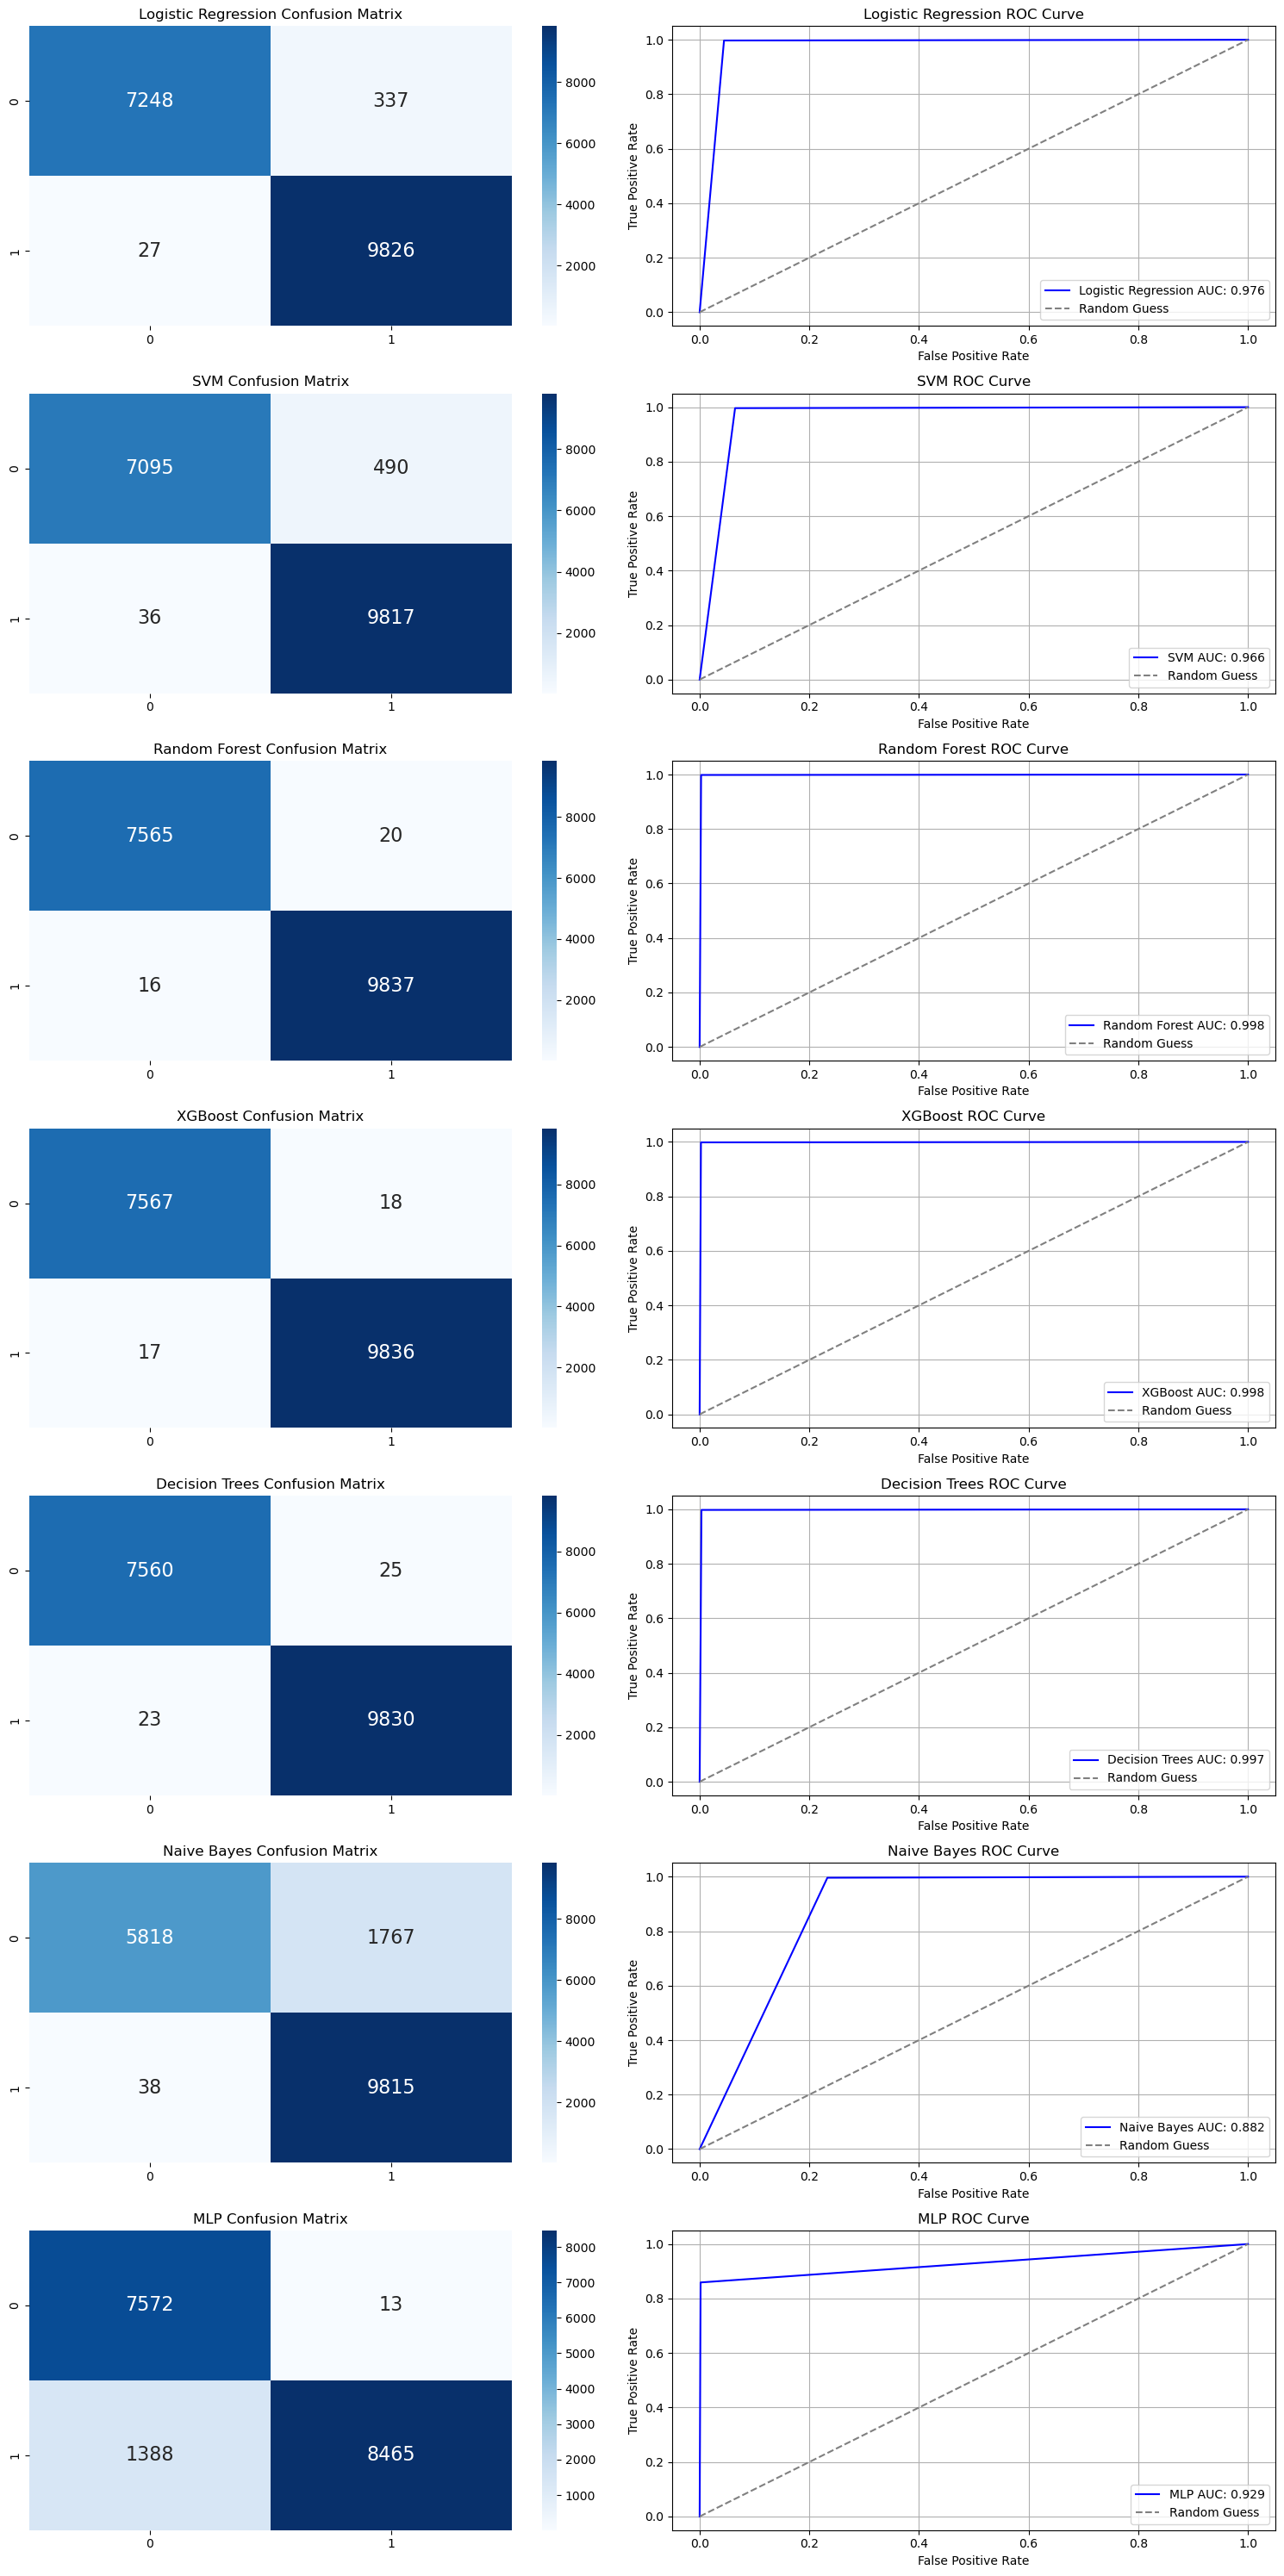

In [143]:
def evaluate_models(models, X_test, y_test):
    table_data = []
    fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(15, 30))
    
    for i, (model_name, model) in enumerate(models.items()):
        ax1, ax2 = axes[i]

        # Predictions
        y_pred = model.predict(X_test)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, cmap='Blues', ax=ax1, fmt='d',annot_kws={'fontsize': 16})
        ax1.set_title(f'{model_name} Confusion Matrix')

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        ax2.plot(fpr, tpr, color='blue', label=f'{model_name} AUC: {auc(fpr, tpr):.3f}')
        ax2.plot([0, 1], [0, 1], '--', color='grey', label='Random Guess')
        ax2.set_title(f'{model_name} ROC Curve')
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.legend()
        ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Defining the models to compare

best_models = {
    "Logistic Regression": lr_best_model,
    "SVM": svm_best_model,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
    "Decision Trees": dt_classifier,
    "Naive Bayes": nb_best_model,
    "MLP": mlp_classifier
}

# Evaluation and comparison of models
print("Comparing Metrics and ROC Curves for Best Models for each Classfier")
print("===================================================")
evaluate_models(best_models, X_test, y_test)

<font color='darkblue'> <b>Evaluating Mean Squared Error for each model</b></font>

In [156]:
def evaluate_models(models, X, y):
    table_data = []
    best_model = None
    best_mse = float('inf')

    for model_name, model in models.items():
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        table_data.append([model_name, mse])
        
        if mse < best_mse:
            best_model = model_name
            best_mse = mse

    table_headers = ['Model', 'MSE']
    print(tabulate(table_data, table_headers))
    
    # Print best model
    print('\n')
    print(f"\033[1mBest Model: {best_model} with lowest MSE: {best_mse}\033[0m")

best_models = {
    "Logistic Regression": lr_best_model,
    "SVM": svm_best_model,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
    "Decision Trees": dt_classifier,
    "Naive Bayes": nb_best_model,
    "MLP": mlp_classifier
}

print("Comparing Mean Squared Error (MSE) for Base Models on Testing Set")
print("============================================")
evaluate_models(best_models, X_test, y_test)

Comparing Mean Squared Error (MSE) for Base Models on Testing Set
Model                       MSE
-------------------  ----------
Logistic Regression  0.020874
SVM                  0.030164
Random Forest        0.00206446
XGBoost              0.00200711
Decision Trees       0.00275261
Naive Bayes          0.10351
MLP                  0.0803418


Best Model: XGBoost with lowest MSE: 0.00200711090721413


#### <font color='green'> Plotting Precision Recall Curves </font>

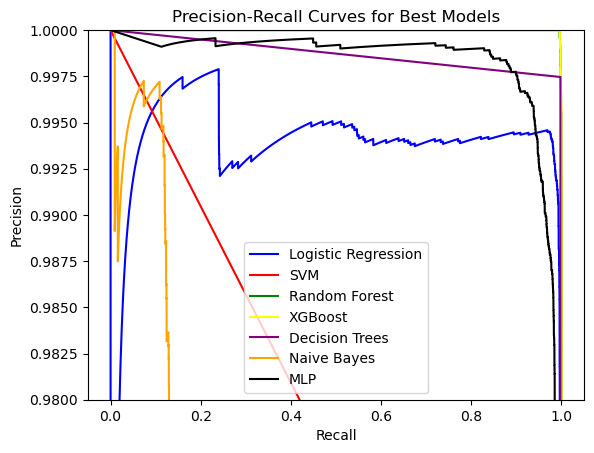

In [179]:
def plot_precision_recall_curves(models_dict):
    colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'black']
    for i, (model_name, model) in enumerate(models_dict.items()):
        if hasattr(model, 'predict_proba'):
            y_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_scores = model.predict(X_test)
        precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
        plt.plot(recall, precision, label=model_name, color=colors[i % len(colors)])
    plt.legend()
    plt.title('Precision-Recall Curves for Best Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.98, 1.0])  # Set y-axis limits to zoom in on the area of interest
    plt.show()

# Example usage:
models_dict = {
    "Logistic Regression": lr_best_model,
    "SVM": svm_best_model,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
    "Decision Trees": dt_classifier,
    "Naive Bayes": nb_best_model,
    "MLP": mlp_classifier
}

plot_precision_recall_curves(models_dict)

#### Comparing Top Features

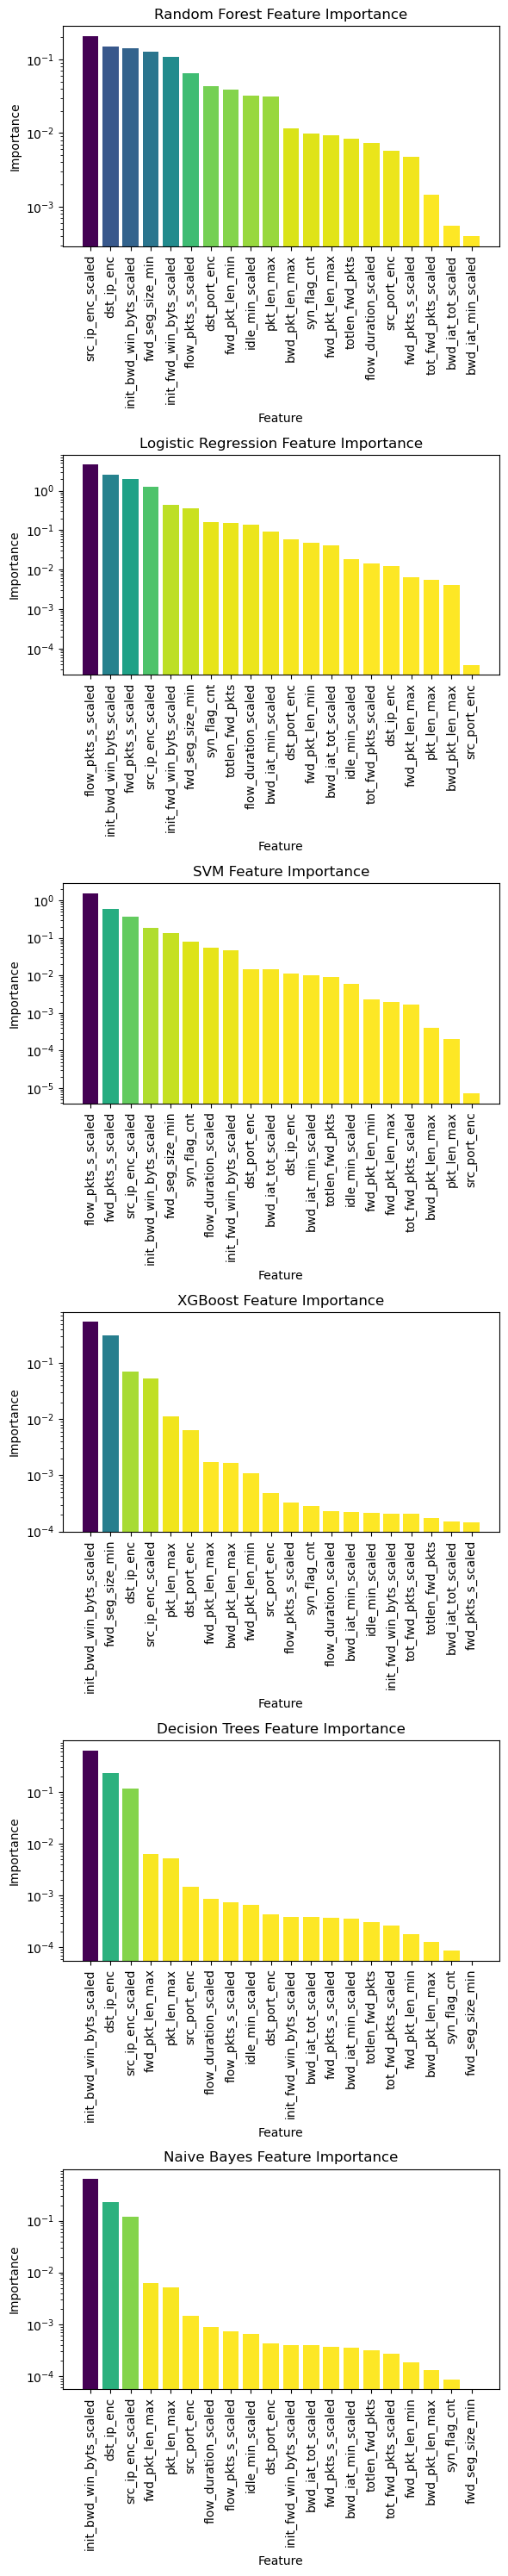

In [206]:
def plot_feature_importances(model_lib, X, y):
    fig, axs = plt.subplots(nrows=len(model_lib), ncols=1, figsize=(6, 5 * len(model_lib)))
    for i, (model_name, model) in enumerate(model_lib.items()):
        if model_name == 'Random Forest':
            importances = model.feature_importances_
        elif model_name == 'Logistic Regression':
            coefs = model.coef_.flatten()
            importances = np.abs(coefs)
        elif model_name == 'SVM':
            coefs = model.coef_.flatten()
            importances = np.abs(coefs)
        elif model_name == 'XGBoost':
            importances = model.feature_importances_
        elif model_name == 'Decision Trees':
            importances = model.feature_importances_
        feat_names = X.columns
        sorted_indices = np.argsort(importances)[::-1]
        # axs[i].bar(feat_names[sorted_indices], importances[sorted_indices])
        axs[i].bar(feat_names[sorted_indices], importances[sorted_indices], color=plt.cm.viridis_r(importances[sorted_indices]/max(importances)))
        axs[i].set_xlabel('Feature')
        axs[i].set_ylabel('Importance')
        axs[i].set_title(f'{model_name} Feature Importance')
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].set_yscale('log')
    plt.tight_layout()
    plt.show()

# Example usage:
model_lib = {
    "Random Forest": rf_classifier,
    "Logistic Regression": lr_classifier,
    "SVM": svm_classifier,
    "XGBoost": xgb_classifier,
    "Decision Trees": dt_classifier,
    "Naive Bayes": nb_classifier
}

plot_feature_importances(model_lib, X_test, y_test)

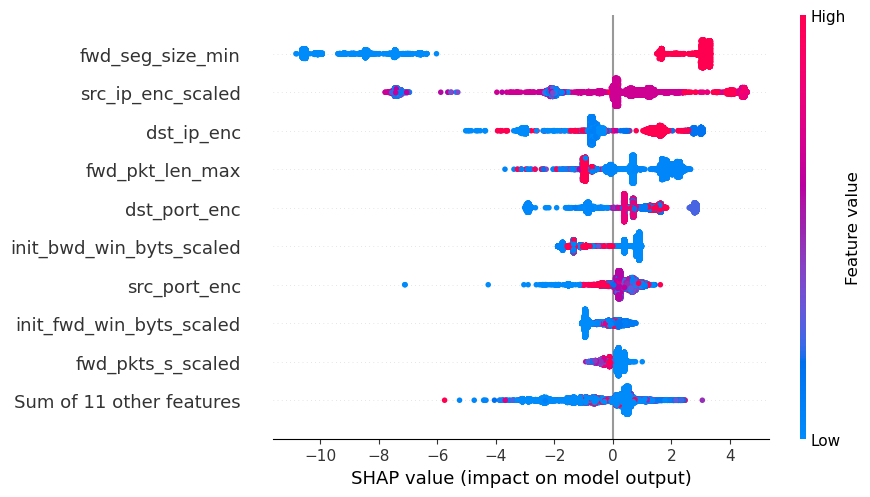

In [211]:
xgb_explainer_tuned = shap.TreeExplainer(xgb_classifier)
xgb_shap_tuned_values = xgb_explainer_tuned(X_test)
shap.plots.beeswarm(xgb_shap_tuned_values)

### <font color='green'><b>Conclusion</b></font>

<font color='darkblue'> We performed feature engineering on raw dataset to identify the best features that impact the overall outcome when classifying attack vs normal traffic. Using the top 20 selected features we trained our base models and although our base models performed well, we did fine tuning for 3/7 models. <br> Based on our observation, we see that ensemble methods (XGBoost and Random Forest) performed exceptionally well even with baseline models. Even though (Decision Tree) is not an ensemble method, it still is a tree based model and it also performed at par ensemble methods. The performance was so good that we did not even need to hypertune these models. Overall Naive Bayes performed the worst out of all our models. <br> <b>To conclude XGBoost is the overall best performing model for our use case, it outperformed every other model even in base configuration </b></font>